# Feature Extraction

_"Mathematically, feature extraction can be seen as a transformation of the original data space, into a new one described by fewer variables, usually orthogonal among them."_

## PCA

PCA is a dimensionality reduction technique that identifies important relationships in our data, transforms the existing data based on these relationships, and then quantifies the importance of these relationships so we can keep the most important relationships and drop the others. The main idea behind PCA is to find the best possible variables: the ones that summarize all the data as well as only possible, among all conceivable linear combinations of the original ones, and that simultaneously allow for reconstructing the original data, also as well as possible. To remember this definition, we can break it down into four steps:

* We identify the relationship among features through a Covariance Matrix.
* Through the linear transformation or eigendecomposition of the Covariance Matrix, we get eigenvectors and eigenvalues.
* Then we transform our data using Eigenvectors into principal components.
* Lastly, we quantify the importance of these relationships using Eigenvalues and keep the important principal components.


**Data Cleaning is Important**: PCA is sensitive to outliers and missing values. [source](https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a)

**Standardize Data**: PCA uses Euclidean distance as its feature vector similarity metric, so make sure we scale the features before applying PCA. [source](https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a)


That being said, Principal Component Analysis must **only** be performed on Data that has been standardized and have its outliers handled, since it is very sensitive to irregularities.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds

import csv
import seaborn as sns

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, IncrementalPCA

data = pd.read_csv('../datasets/hf_scaled/HF_normalized.csv')

y = data.pop('DEATH_EVENT')
X = data

data.head()

age  creatinine_phosphokinase  ejection_fraction  platelets  \
0  0.636364                  0.071319           0.090909   0.290823   
1  0.272727                  1.000000           0.363636   0.288833   
2  0.454545                  0.015693           0.090909   0.165960   
3  0.181818                  0.011227           0.090909   0.224148   
4  0.454545                  0.017479           0.090909   0.365984   

   serum_creatinine  serum_sodium      time  anaemia  diabetes  \
0          0.157303      0.485714  0.000000        0         0   
1          0.067416      0.657143  0.007117        0         0   
2          0.089888      0.457143  0.010676        0         0   
3          0.157303      0.685714  0.010676        1         0   
4          0.247191      0.085714  0.014235        1         1   

   high_blood_pressure  sex  smoking  
0                    1    1        0  
1                    0    1        0  
2                    0    1        1  
3                    0    1        0  
4                    0    0        0

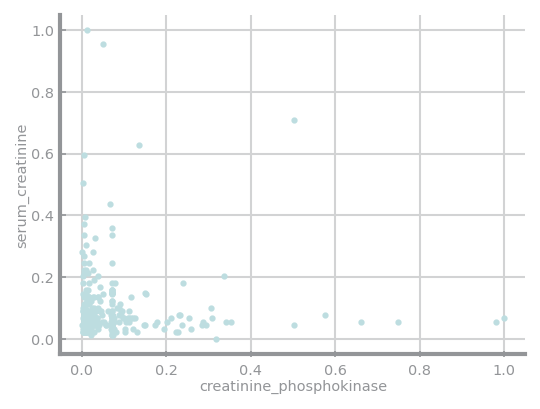

In [2]:
variables = data.columns.values
eixo_x = 0
eixo_y = 1
eixo_z = 4

plt.figure()
plt.xlabel(variables[eixo_y])
plt.ylabel(variables[eixo_z])
plt.scatter(data.iloc[:, eixo_y], data.iloc[:, eixo_z])
plt.show()

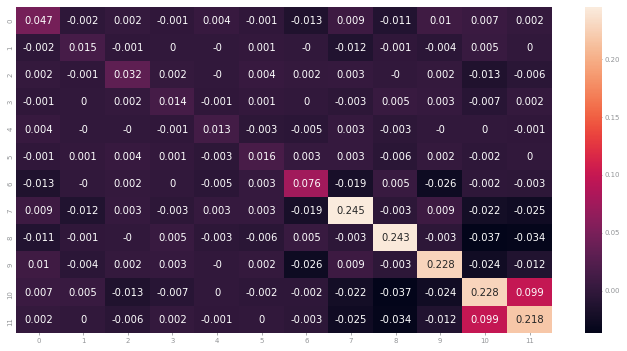

In [3]:
#  “Covariance” indicates the direction of the linear relationship between variables.
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)

covMatrix = np.cov(X.T, bias=True)
covMatrix = np.round(covMatrix, 3)
sns.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

### PCA - Linear Dim. Reduction with Singular Value Decomposition

* Find number of components to keep [[1]](https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/)
* Perform PCA with all the relevant datasets
* Save the results to a CSV

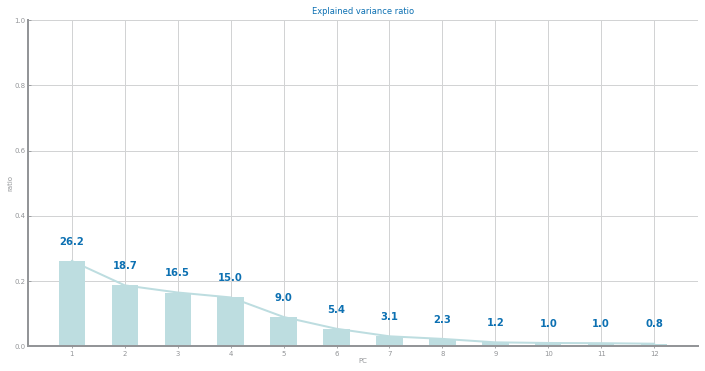

In [4]:
mean = (data.mean(axis=0)).tolist()
centered_data = data - mean
cov_mtx = centered_data.cov()
eigvals, eigvecs = np.linalg.eig(cov_mtx)

pca = PCA()
pca.fit(centered_data)
PC = pca.components_
var = pca.explained_variance_

# PLOT EXPLAINED VARIANCE RATIO
fig = plt.figure(figsize=(12, 6))
plt.title('Explained variance ratio')
plt.xlabel('PC')
plt.ylabel('ratio')
x_values = [str(i) for i in range(1, len(pca.components_) + 1)]
bwidth = 0.5
ax = plt.gca()
ax.set_xticklabels(x_values)
ax.set_ylim(0.0, 1.0)
ax.bar(x_values, pca.explained_variance_ratio_, width=bwidth)
ax.plot(pca.explained_variance_ratio_)
for i, v in enumerate(pca.explained_variance_ratio_):
    ax.text(i, v+0.05, f'{v*100:.1f}', ha='center', fontweight='bold')
plt.show()

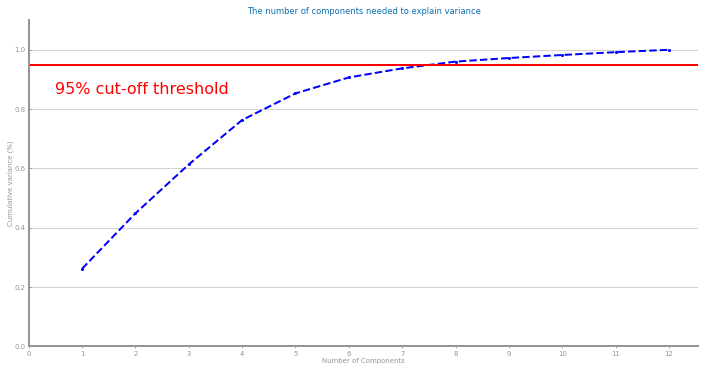

In [5]:
# To choose the number of componenets we want to keep, we wish to achieve a cumulative explained variance of 95%-99%, as 
#explained in [1]

pca = PCA().fit(X)

fig, ax = plt.subplots()
xi = np.arange(1, 13, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 13, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

From the graph, we can see we need 8 componenets to achieve the desired threshold of 95% for the Covariance.

In [6]:
# Alternatively, sklearn.decomposition.PCA supports a parameter that allows for the desired Cov threshold
pca = PCA(n_components = 0.95).fit(X)

# Transform the data according to the previous fit
X_transformation = pca.transform(X)

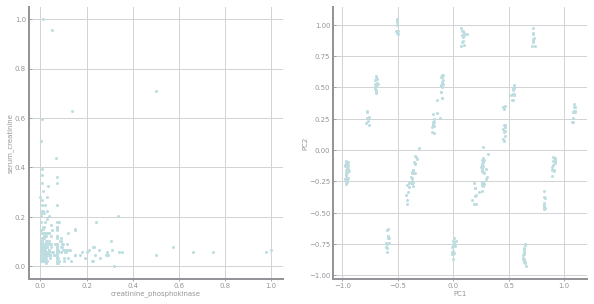

In [7]:
# ScatterPlot the results
variables = data.columns.values
eixo_x = 0
eixo_y = 1
eixo_z = 4

_, axs = plt.subplots(1, 2, figsize=(2*5, 1*5), squeeze=False)
axs[0,0].set_xlabel(variables[eixo_y])
axs[0,0].set_ylabel(variables[eixo_z])
axs[0,0].scatter(data.iloc[:, eixo_y], data.iloc[:, eixo_z])

axs[0,1].set_xlabel('PC1')
axs[0,1].set_ylabel('PC2')
plt.scatter(X_transformation[:, 0], X_transformation[:, 1])
plt.show()

In [8]:
print("New X:", X_transformation.shape)
print("Y:", y.shape)

New X: (299, 8)
Y: (299,)


In [9]:
# Merge results into a single dataframe
y = np.array(y).reshape((y.shape[0], 1))
to_be_df = np.append(X_transformation, y, axis=1)
column_names = [("Eigen" + str(i)) for i in range (0, X_transformation.shape[1])] + ["DEATH_EVENT"]

store_data = pd.DataFrame(data=to_be_df, columns=column_names)
store_data.head()

Eigen0    Eigen1    Eigen2    Eigen3    Eigen4    Eigen5    Eigen6  \
0 -0.184975  0.287692  0.818452 -0.122751 -0.562737  0.429694 -0.013436   
1 -0.373112 -0.175180  0.034716 -0.540561 -0.486261  0.469155 -0.333243   
2 -0.964366 -0.086946  0.026650 -0.153143  0.227040  0.521557 -0.149150   
3 -0.099851  0.543036 -0.567965 -0.200317 -0.441639  0.309863 -0.422397   
4  0.900035 -0.057615 -0.604180  0.209631  0.208703  0.535572 -0.128628   

     Eigen7  DEATH_EVENT  
0 -0.271746          1.0  
1  0.144378          1.0  
2 -0.248192          1.0  
3 -0.123680          1.0  
4 -0.391019          1.0

In [10]:
# Store DataFrame to a CSV
store_data.to_csv('../datasets/pca_output/hf/HF_normalized_pca.csv', index=False)

### KPCA - Kernel Principal Component Analysis
Non-linear dimensionality reduction through the use of kernels

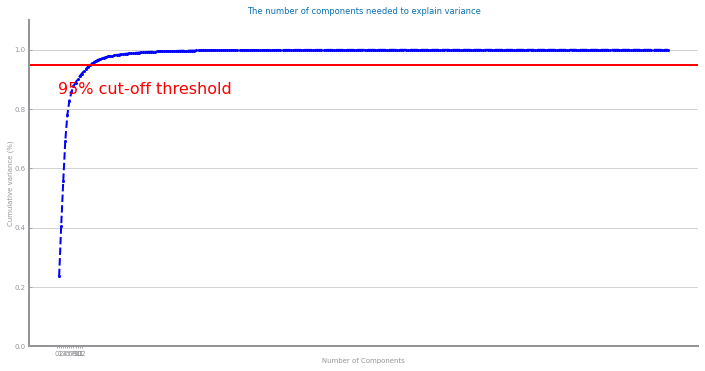

In [11]:
# To choose the number of componenets we want to keep, we wish to achieve a cumulative explained variance of 95%-99%, as 
#explained in [1]

kpca = KernelPCA(kernel='rbf')

kpca_transform = kpca.fit_transform(X)
explained_variance = np.var(kpca_transform, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

fig, ax = plt.subplots()
yi = np.cumsum(explained_variance_ratio)
xi = np.arange(1, len(yi) + 1, step=1)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 13, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [12]:
n_components = np.argmax(yi > 0.95) + 1
n_components

17

In [13]:
kpca = KernelPCA(n_components = n_components, kernel='rbf').fit(X)

# Transform the data according to the previous fit
X_transformation = kpca.transform(X)

In [14]:
print("New X:", X_transformation.shape)
print("Y:", y.shape)

New X: (299, 17)
Y: (299, 1)


In [15]:
# Merge results into a single dataframe
y = np.array(y).reshape((y.shape[0], 1))
to_be_df = np.append(X_transformation, y, axis=1)
column_names = [("Eigen" + str(i)) for i in range (0, X_transformation.shape[1])] + ["DEATH_EVENT"]

store_data = pd.DataFrame(data=to_be_df, columns=column_names)
store_data.head()

Eigen0    Eigen1    Eigen2    Eigen3    Eigen4    Eigen5    Eigen6  \
0 -0.064438  0.101624  0.300704 -0.032554 -0.208888  0.154186 -0.004570   
1 -0.130073 -0.060649  0.020690 -0.186823 -0.165811  0.169190 -0.120262   
2 -0.352135 -0.032550  0.012912 -0.050473  0.091837  0.191129 -0.055174   
3 -0.035810  0.204496 -0.205982 -0.083670 -0.165243  0.116890 -0.155206   
4  0.316791 -0.017170 -0.213018  0.066824  0.082757  0.185841 -0.048704   

     Eigen7    Eigen8    Eigen9   Eigen10   Eigen11   Eigen12   Eigen13  \
0 -0.097249  0.020370  0.032227  0.012078 -0.005336 -0.014615 -0.041203   
1  0.046235 -0.106178 -0.119301  0.244128 -0.066243  0.046943 -0.116374   
2 -0.093620 -0.036766  0.061140 -0.010927  0.013126 -0.027504 -0.002638   
3 -0.051577  0.039330 -0.011484 -0.032055 -0.006103 -0.026794  0.009003   
4 -0.129083  0.015525  0.154732  0.060005  0.041034  0.013752 -0.071658   

    Eigen14   Eigen15   Eigen16  DEATH_EVENT  
0 -0.032258  0.020910 -0.046040          1.0  
1  0.053364 -0.013056  0.006795          1.0  
2 -0.009954 -0.021975 -0.011700          1.0  
3  0.017346  0.016759  0.045615          1.0  
4 -0.068447  0.015738 -0.021362          1.0

In [16]:
# Store DataFrame to a CSV
store_data.to_csv('../datasets/pca_output/hf/HF_normalized_kpca.csv', index=False)

### IPCA - Incremental Principal Component Analysis
Linear dimensionality reduction using Singular Value Decomposition of the data, keeping only the most significant singular vectors to project the data to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

Depending on the size of the input data, this algorithm can be much more memory efficient than a PCA, and allows sparse input.

This algorithm has constant memory complexity, on the order of batch_size * n_features, enabling use of np.memmap files without loading the entire file into memory. For sparse matrices, the input is converted to dense in batches (in order to be able to subtract the mean) which avoids storing the entire dense matrix at any one time.

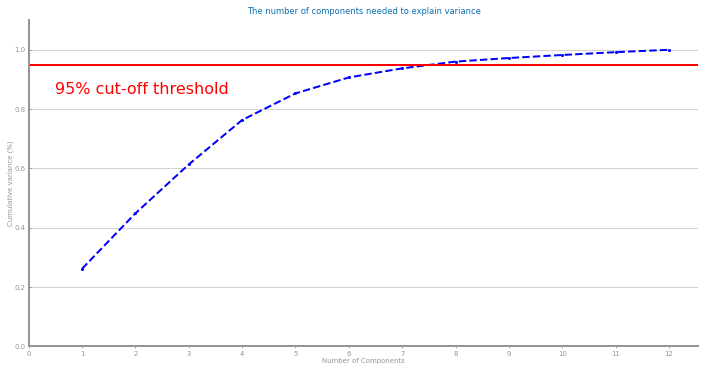

In [17]:
# To choose the number of componenets we want to keep, we wish to achieve a cumulative explained variance of 95%-99%, as 
#explained in [1]

ipca = IncrementalPCA(batch_size=20)

ipca_transform = ipca.fit_transform(X)
explained_variance = np.var(ipca_transform, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

fig, ax = plt.subplots()
yi = np.cumsum(explained_variance_ratio)
xi = np.arange(1, len(yi) + 1, step=1)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 13, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

From the graph, we can see we need 8 components to achieve the desired threshold of 95% for the Covariance.

In [18]:
n_components = np.argmax(yi > 0.95) + 1
n_components

8

In [19]:
ipca = IncrementalPCA(n_components = n_components, batch_size=20).fit(X)

# Transform the data according to the previous fit
X_transformation = ipca.transform(X)

In [20]:
print("New X:", X_transformation.shape)
print("Y:", y.shape)

New X: (299, 8)
Y: (299, 1)


In [21]:
# Merge results into a single dataframe
y = np.array(y).reshape((y.shape[0], 1))
to_be_df = np.append(X_transformation, y, axis=1)
column_names = [("Eigen" + str(i)) for i in range (0, X_transformation.shape[1])] + ["DEATH_EVENT"]

store_data = pd.DataFrame(data=to_be_df, columns=column_names)
store_data.head()

Eigen0    Eigen1    Eigen2    Eigen3    Eigen4    Eigen5    Eigen6  \
0  0.185006  0.283078  0.817980 -0.123010 -0.563790 -0.449444 -0.119171   
1  0.373297 -0.177175  0.034495 -0.544343 -0.491033 -0.430868 -0.397271   
2  0.964385 -0.090762  0.024785 -0.156942  0.227260 -0.505103 -0.245765   
3  0.099885  0.541955 -0.567851 -0.203196 -0.440304 -0.250082 -0.463440   
4 -0.900164 -0.059245 -0.606391  0.206699  0.208997 -0.560849 -0.284810   

     Eigen7  DEATH_EVENT  
0 -0.219080          1.0  
1  0.424116          1.0  
2 -0.195782          1.0  
3 -0.039497          1.0  
4 -0.304825          1.0

In [22]:
# Store DataFrame to a CSV
store_data.to_csv('../datasets/pca_output/hf/HF_normalized_ipca.csv', index=False)

## LDA

Unlike PCA, Linear Discriminant Analysis tries to reduce dimensions of the feature set while retaining the information that discriminates output classes. LDA tries to find a decision boundary around each cluster of a class. It then projects the data points to new dimensions in a way that the clusters are as separate from each other as possible and the individual elements within a cluster are as close to the centroid of the cluster as possible. The new dimensions are ranked on the basis of their ability to maximize the distance between the clusters and minimize the distance between the data points within a cluster and their centroids. These new dimensions form the linear discriminants of the feature set. [source](https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/)

LDA takes the output class labels into account while selecting the linear discriminants, while PCA doesn't depend upon the output labels.

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

data = pd.read_csv('../datasets/hf_scaled/HF_normalized.csv')

y = data.pop('DEATH_EVENT')
X = data

data.head()

age  creatinine_phosphokinase  ejection_fraction  platelets  \
0  0.636364                  0.071319           0.090909   0.290823   
1  0.272727                  1.000000           0.363636   0.288833   
2  0.454545                  0.015693           0.090909   0.165960   
3  0.181818                  0.011227           0.090909   0.224148   
4  0.454545                  0.017479           0.090909   0.365984   

   serum_creatinine  serum_sodium      time  anaemia  diabetes  \
0          0.157303      0.485714  0.000000        0         0   
1          0.067416      0.657143  0.007117        0         0   
2          0.089888      0.457143  0.010676        0         0   
3          0.157303      0.685714  0.010676        1         0   
4          0.247191      0.085714  0.014235        1         1   

   high_blood_pressure  sex  smoking  
0                    1    1        0  
1                    0    1        0  
2                    0    1        1  
3                    0    1        0  
4                    0    0        0

In [24]:
# Create a function to select the optimal number of components for LDA
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [25]:
lda = LDA(n_components=None)
X_transformation = lda.fit(X, y)
lda_var_ratios = lda.explained_variance_ratio_

n_components = select_n_components(lda_var_ratios, 0.95)

In [26]:
lda = LDA(n_components=n_components)
X_transformation = lda.fit_transform(X, y)

X_transformation.shape

(299, 1)

In [27]:
# Sanity Check

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(max_depth=2, random_state=0)

y = np.array(y).reshape(-1, 1)

classifier.fit(X, y)
pred = classifier.predict(X)

accuracy_score(y, pred)

0.8327759197324415

In [28]:
# Merge results into a single dataframe
y = np.array(y).reshape((y.shape[0], 1))
to_be_df = np.append(X_transformation, y, axis=1)
column_names = [("Eigen" + str(i)) for i in range (0, X_transformation.shape[1])] + ["DEATH_EVENT"]

store_data = pd.DataFrame(data=to_be_df, columns=column_names)
store_data.head()

Eigen0  DEATH_EVENT
0 -2.863089          1.0
1 -2.223360          1.0
2 -2.399034          1.0
3 -1.973079          1.0
4 -3.646093          1.0

In [29]:
# Store DataFrame to a CSV
store_data.to_csv('../datasets/pca_output/hf/HF_normalized_lda.csv', index=False)

# Extracting the Code to a Pipeline to run over Datasets

In [30]:
def feature_extraction_pca(X, y, filename):
    
    # Variance Explained
    mean = (X.mean(axis=0)).tolist()
    centered_data = X - mean
    cov_mtx = centered_data.cov()
    eigvals, eigvecs = np.linalg.eig(cov_mtx)

    pca = PCA()
    pca.fit(centered_data)
    PC = pca.components_
    var = pca.explained_variance_
    
    # Plot the covariance matrix for the dataset
    cov_mtx = np.round(cov_mtx, 3)
    sns.heatmap(cov_mtx, annot=True, fmt='g')
    plt.show()

    # PLOT EXPLAINED VARIANCE RATIO
    fig = plt.figure(figsize=(12, 6))
    plt.title('Explained variance ratio')
    plt.xlabel('PC')
    plt.ylabel('ratio')
    x_values = [str(i) for i in range(1, len(pca.components_) + 1)]
    bwidth = 0.5
    ax = plt.gca()
    ax.set_xticklabels(x_values)
    ax.set_ylim(0.0, 1.0)
    ax.bar(x_values, pca.explained_variance_ratio_, width=bwidth)
    ax.plot(pca.explained_variance_ratio_)
    for i, v in enumerate(pca.explained_variance_ratio_):
        ax.text(i, v+0.05, f'{v*100:.1f}', ha='center', fontweight='bold')
    plt.show()
    
    # Cumulative Variance Explained
    pca = PCA().fit(X)

    fig, ax = plt.subplots()
    xi = np.arange(1, len(pca.components_) + 1, step=1)
    yi = np.cumsum(pca.explained_variance_ratio_)

    plt.ylim(0.0,1.1)
    plt.plot(xi, yi, marker='o', linestyle='--', color='b')

    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, len(pca.components_) + 1, step=1)) #change from 0-based array index to 1-based human-readable label
    plt.ylabel('Cumulative variance (%)')
    plt.title('The number of components needed to explain variance')

    plt.axhline(y=0.95, color='r', linestyle='-')
    plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

    ax.grid(axis='x')
    plt.show()
    
    # Alternatively, sklearn.decomposition.PCA supports a parameter that allows for the desired Cov threshold
    pca = PCA(n_components = 0.95).fit(X)

    # Transform the data according to the previous fit
    X_transformation = pca.transform(X)
        
    # Merge results into a single dataframe
    y = np.array(y).reshape((y.shape[0], 1))
    to_be_df = np.append(X_transformation, y, axis=1)
    column_names = [("Eigen" + str(i)) for i in range (0, X_transformation.shape[1])] + ["DEATH_EVENT"]

    store_data = pd.DataFrame(data=to_be_df, columns=column_names)
    store_data.head()
    
    # Store DataFrame to a CSV
    output_file = '../datasets/pca_output/hf/' + filename.split('/')[-1].split('.')[0] + '_pca.csv'
    store_data.to_csv(output_file, index=False)

In [31]:
def feature_extraction_kpca(X, y, filename):
    
    # Cumulative Variance Explained
    kpca = KernelPCA(kernel='rbf')

    kpca_transform = kpca.fit_transform(X)
    explained_variance = np.var(kpca_transform, axis=0)
    explained_variance_ratio = explained_variance / np.sum(explained_variance)

    fig, ax = plt.subplots()
    yi = np.cumsum(explained_variance_ratio)
    xi = np.arange(1, len(yi) + 1, step=1)

    plt.ylim(0.0,1.1)
    plt.plot(xi, yi, marker='o', linestyle='--', color='b')

    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, len(yi), step=1)) #change from 0-based array index to 1-based human-readable label
    plt.ylabel('Cumulative variance (%)')
    plt.title('The number of components needed to explain variance')

    plt.axhline(y=0.95, color='r', linestyle='-')
    plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

    ax.grid(axis='x')
    plt.show()
    
    # Extract ideal number of components
    n_components = np.argmax(yi > 0.95) + 1
    
    # Alternatively, sklearn.decomposition.PCA supports a parameter that allows for the desired Cov threshold
    pca = KernelPCA(n_components=n_components, kernel='rbf').fit(X)

    # Transform the data according to the previous fit
    X_transformation = pca.transform(X)
    
    # Merge results into a single dataframe
    y = np.array(y).reshape((y.shape[0], 1))
    to_be_df = np.append(X_transformation, y, axis=1)
    column_names = [("Eigen" + str(i)) for i in range (0, X_transformation.shape[1])] + ["DEATH_EVENT"]

    store_data = pd.DataFrame(data=to_be_df, columns=column_names)
    store_data.head()
    
    # Store DataFrame to a CSV
    output_file = '../datasets/pca_output/hf/' + filename.split('/')[-1].split('.')[0] + '_kpca.csv'
    store_data.to_csv(output_file, index=False)

In [32]:
def feature_extraction_ipca(X, y, filename):
    
    # Cumulative Variance Explained
    kpca = IncrementalPCA(batch_size=20)

    kpca_transform = kpca.fit_transform(X)
    explained_variance = np.var(kpca_transform, axis=0)
    explained_variance_ratio = explained_variance / np.sum(explained_variance)

    fig, ax = plt.subplots()
    yi = np.cumsum(explained_variance_ratio)
    xi = np.arange(1, len(yi) + 1, step=1)

    plt.ylim(0.0,1.1)
    plt.plot(xi, yi, marker='o', linestyle='--', color='b')

    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, len(yi), step=1)) #change from 0-based array index to 1-based human-readable label
    plt.ylabel('Cumulative variance (%)')
    plt.title('The number of components needed to explain variance')

    plt.axhline(y=0.95, color='r', linestyle='-')
    plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

    ax.grid(axis='x')
    plt.show()
    
    # Extract ideal number of components
    n_components = np.argmax(yi > 0.95) + 1
    
    # Alternatively, sklearn.decomposition.PCA supports a parameter that allows for the desired Cov threshold
    pca = IncrementalPCA(n_components=n_components, batch_size=20).fit(X)

    # Transform the data according to the previous fit
    X_transformation = pca.transform(X)
    
    # Merge results into a single dataframe
    y = np.array(y).reshape((y.shape[0], 1))
    to_be_df = np.append(X_transformation, y, axis=1)
    column_names = [("Eigen" + str(i)) for i in range (0, X_transformation.shape[1])] + ["DEATH_EVENT"]

    store_data = pd.DataFrame(data=to_be_df, columns=column_names)
    store_data.head()
    
    # Store DataFrame to a CSV
    output_file = '../datasets/pca_output/hf/' + filename.split('/')[-1].split('.')[0] + '_ipca.csv'
    store_data.to_csv(output_file, index=False)

In [33]:
def feature_extraction_lda(X, y, filename):
    
    lda = LDA(n_components=None)
    lda.fit(X, y)
    lda_var_ratios = lda.explained_variance_ratio_

    n_components = select_n_components(lda_var_ratios, 0.95)
    
    lda = LDA(n_components=n_components)
    X_transformation = lda.fit_transform(X, y)
    
    # Merge results into a single dataframe
    y = np.array(y).reshape((y.shape[0], 1))
    to_be_df = np.append(X_transformation, y, axis=1)
    column_names = [("Eigen" + str(i)) for i in range (0, X_transformation.shape[1])] + ["DEATH_EVENT"]

    store_data = pd.DataFrame(data=to_be_df, columns=column_names)
    store_data.head()
    
    output_file = '../datasets/pca_output/hf/' + filename.split('/')[-1].split('.')[0] + '_lda.csv'
    store_data.to_csv(output_file, index=False)

In [34]:
def perform_component_analysis(filename):
    
    print("ANALYZING:", filename)
    
    data = pd.read_csv(filename)

    y = data.pop('DEATH_EVENT')
    X = data
            
    feature_extraction_pca(X, y, filename)
    feature_extraction_kpca(X, y, filename)
    feature_extraction_ipca(X, y, filename)
    feature_extraction_lda(X, y, filename)


ANALYZING: ../datasets/pca_input/hf/HF_S_FAnova_extra_outlierTrim_IQS_B.csv


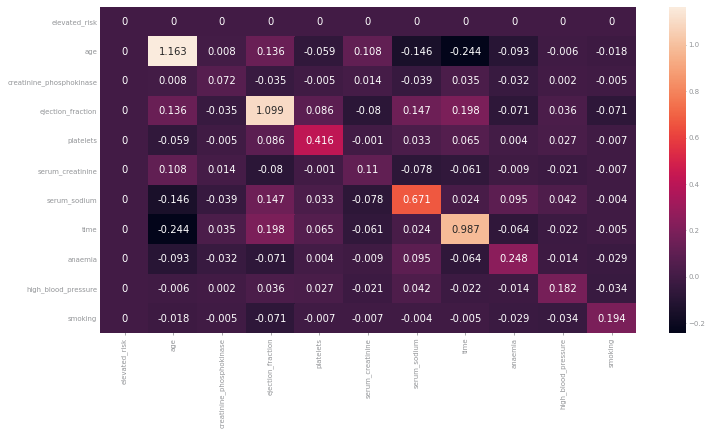

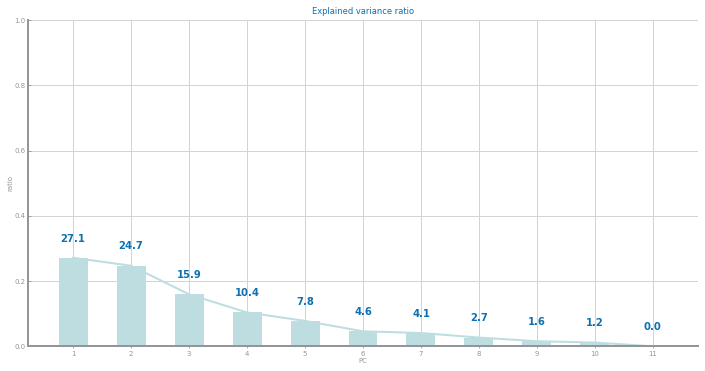

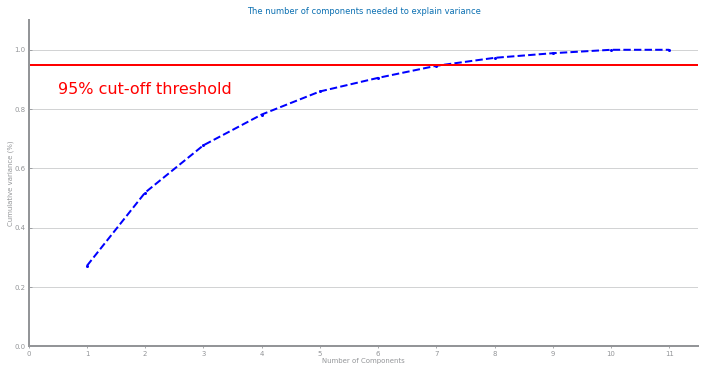

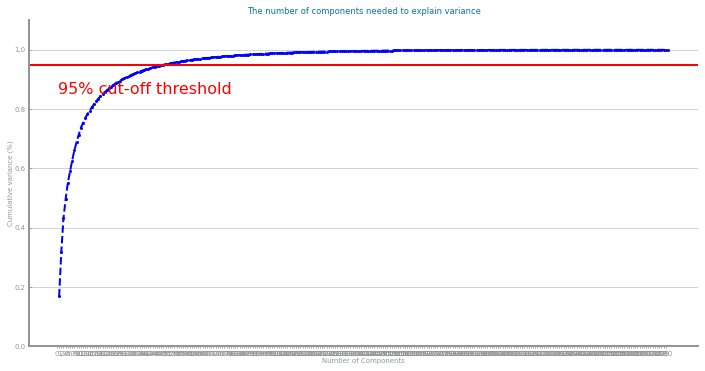

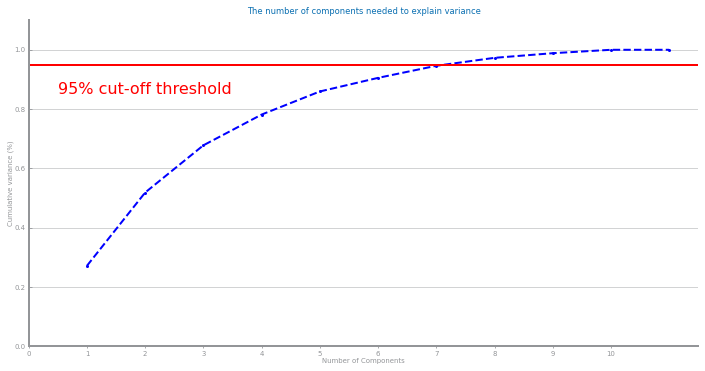

ANALYZING: ../datasets/pca_input/hf/HF_S_FAnova_outlierTrim_IQS_B.csv


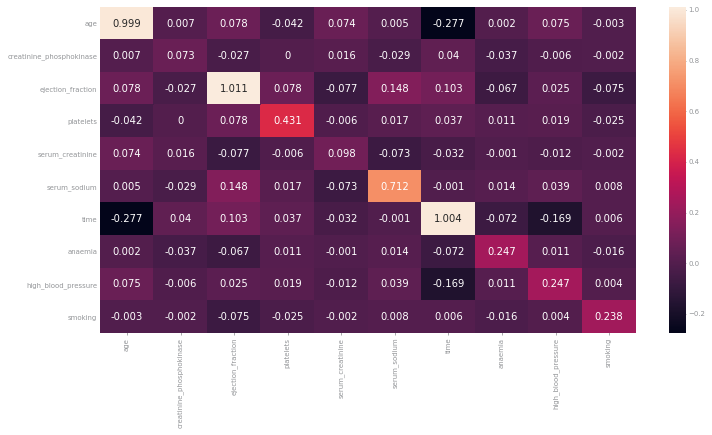

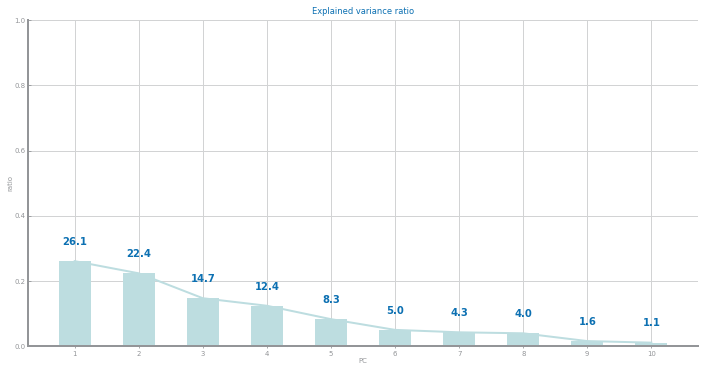

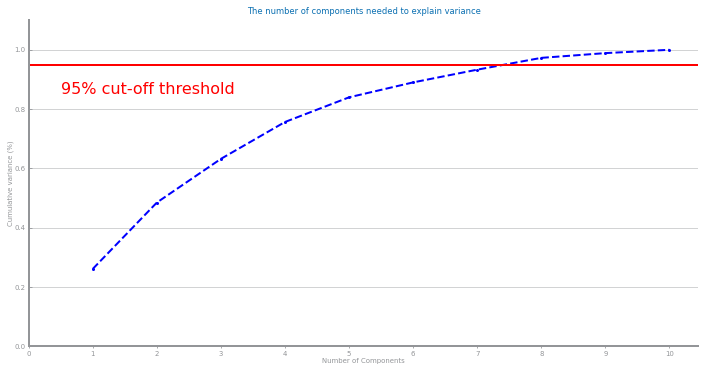

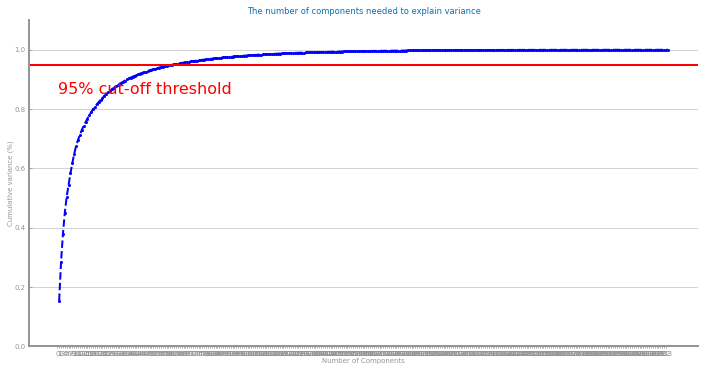

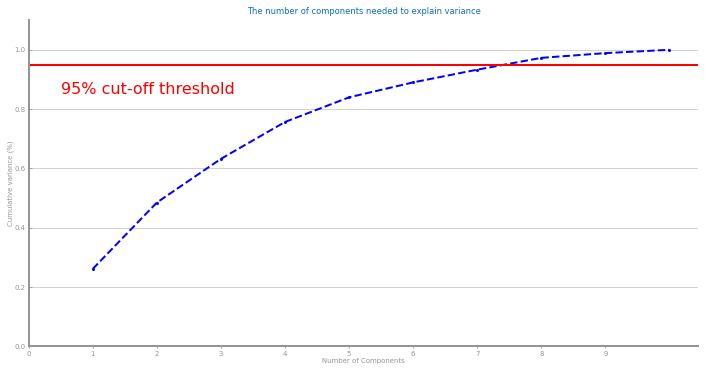

ANALYZING: ../datasets/pca_input/hf/HR_BS_outlierTrim_IQS.csv


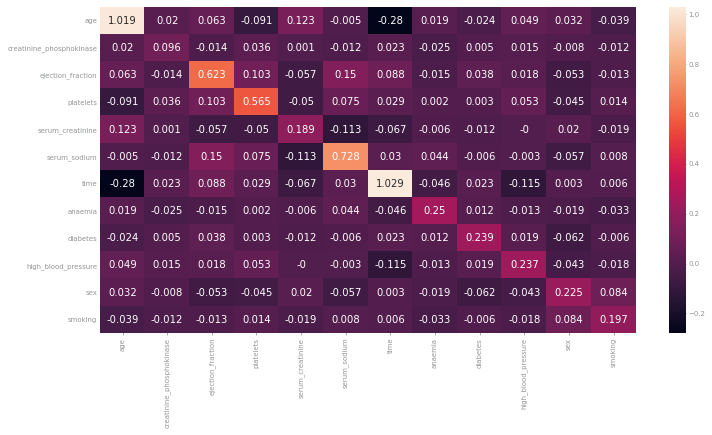

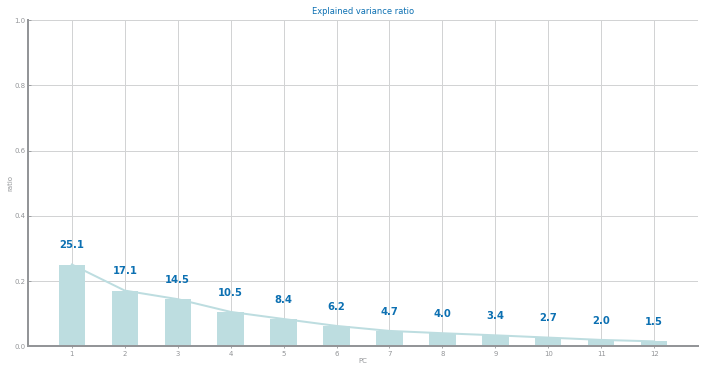

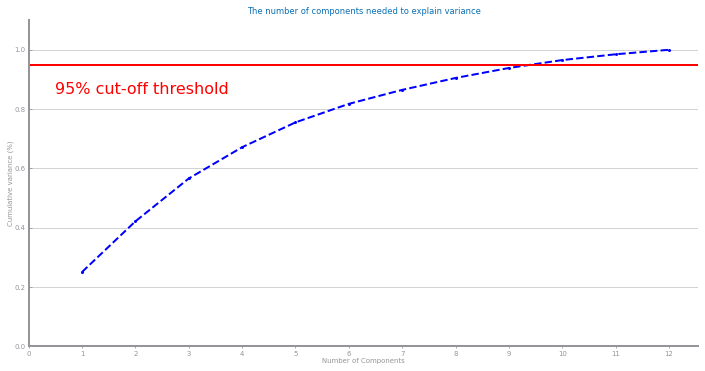

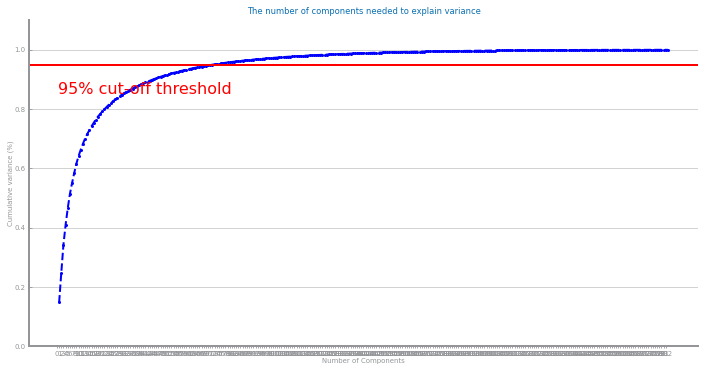

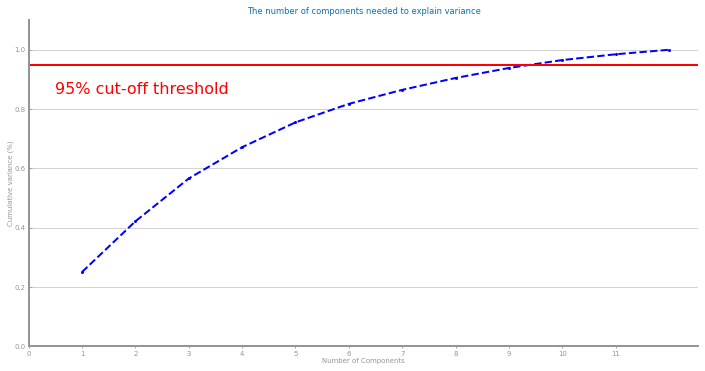

ANALYZING: ../datasets/pca_input/hf/HR_BS_outlierTrim_Z.csv


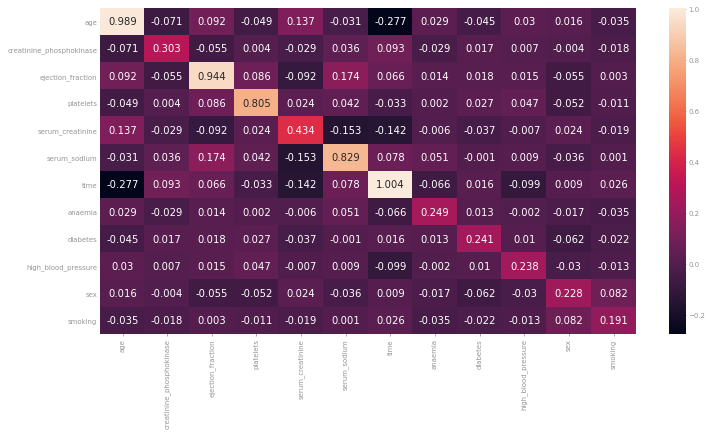

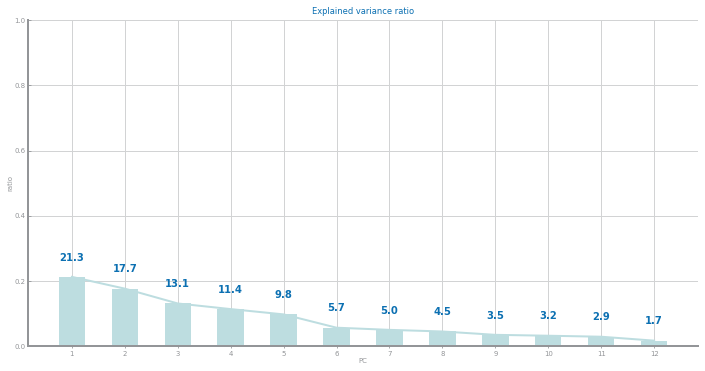

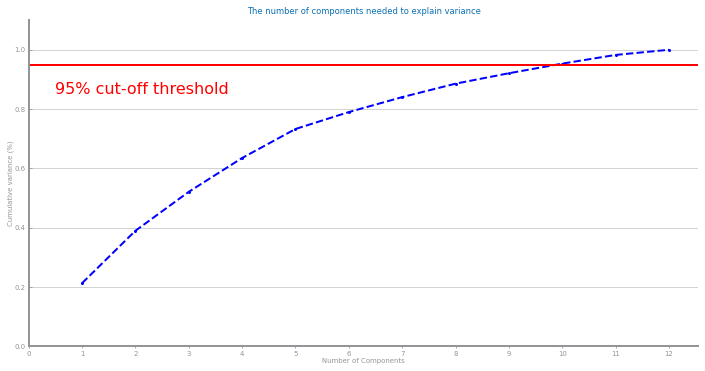

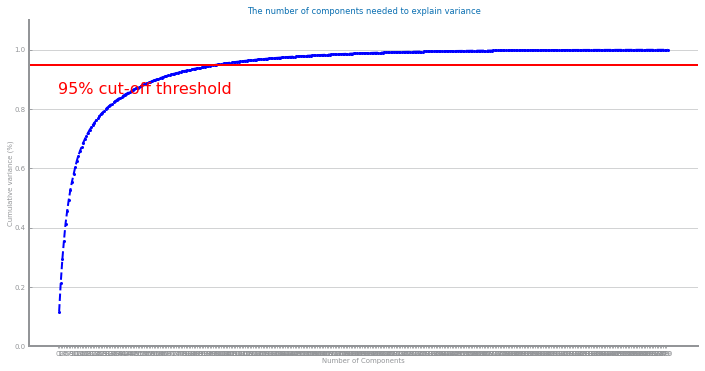

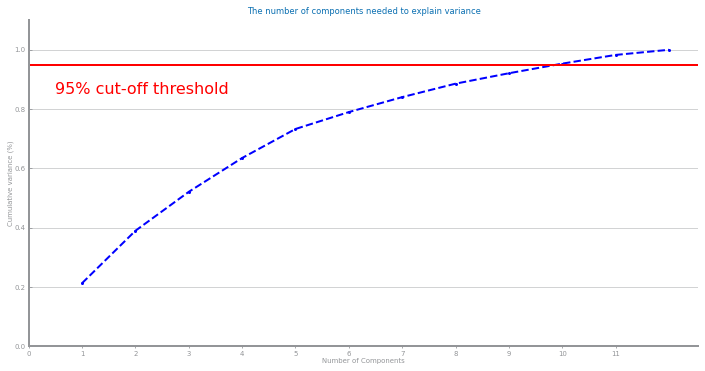

ANALYZING: ../datasets/pca_input/hf/HR_BS_outlierWins.csv


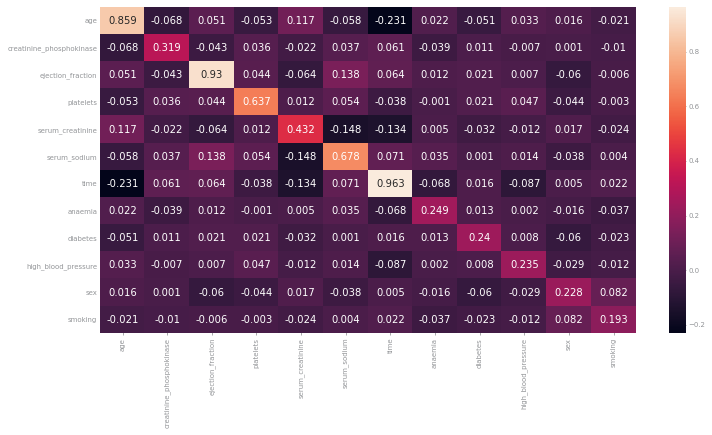

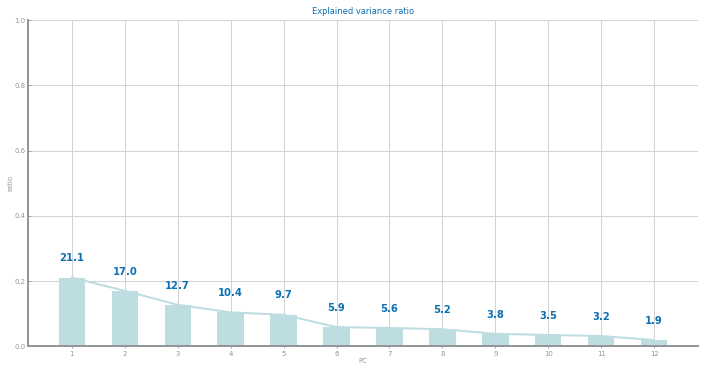

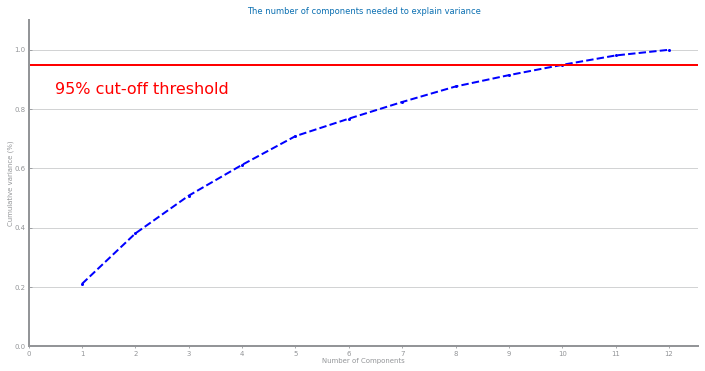

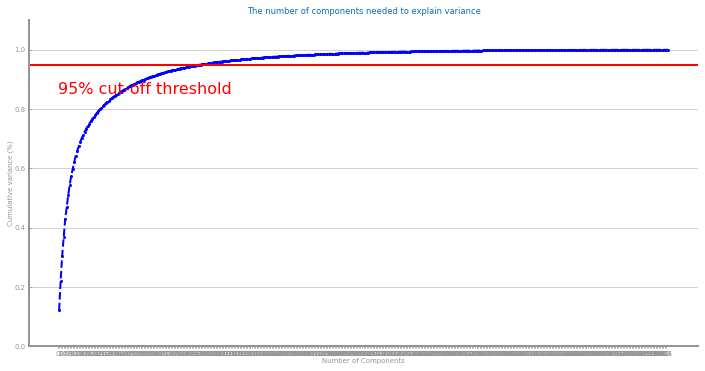

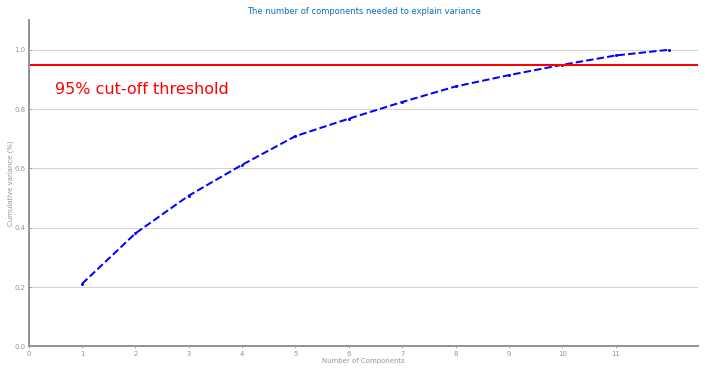

ANALYZING: ../datasets/pca_input/hf/HR_S_FAnova_extra_outlierTrim_IQS.csv


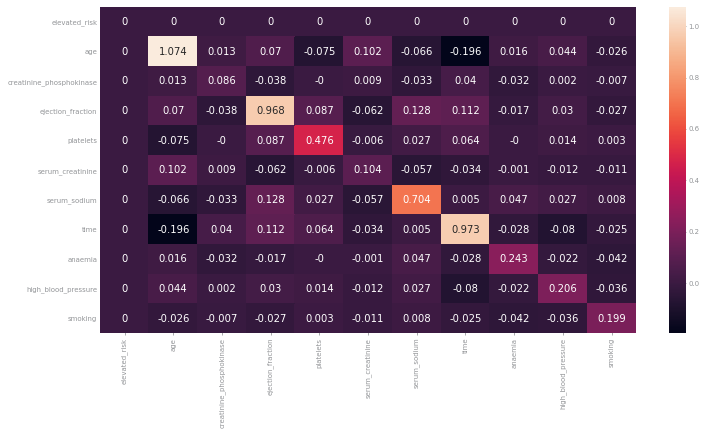

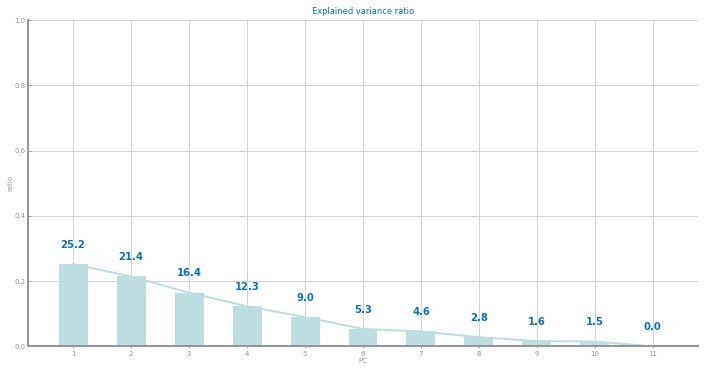

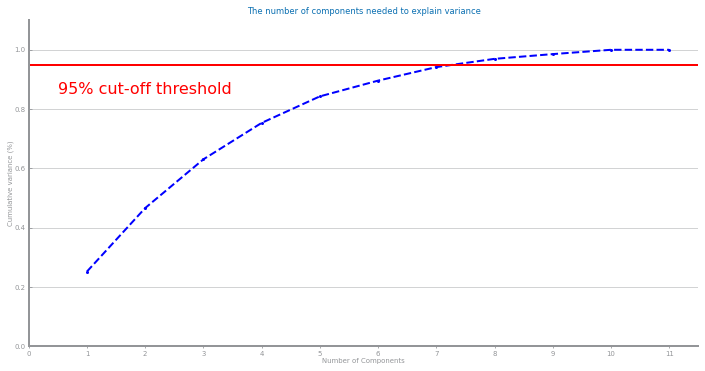

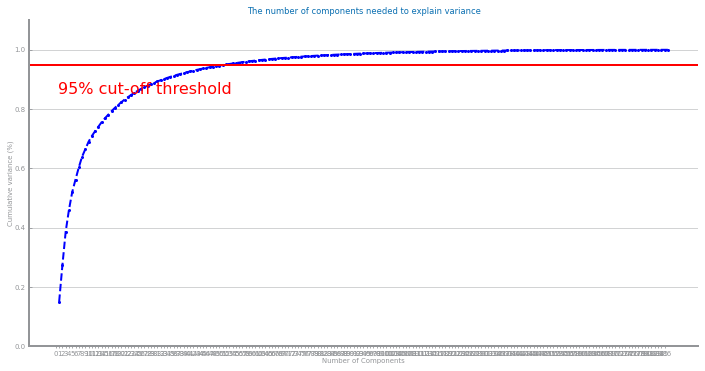

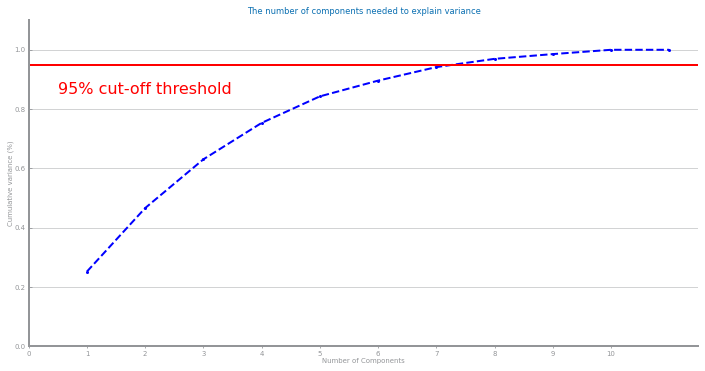

ANALYZING: ../datasets/pca_input/hf/HR_S_FAnova_outlierTrim_IQS.csv


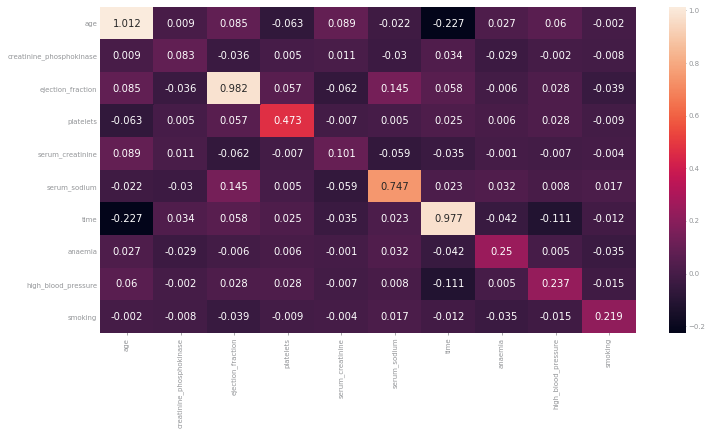

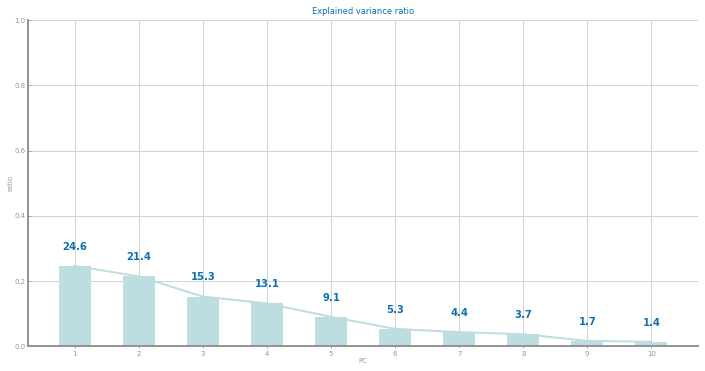

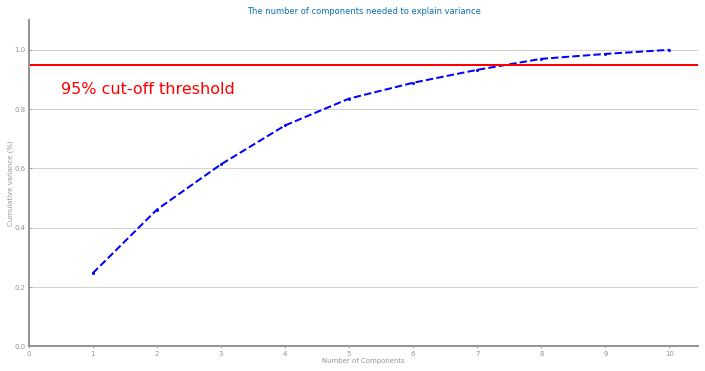

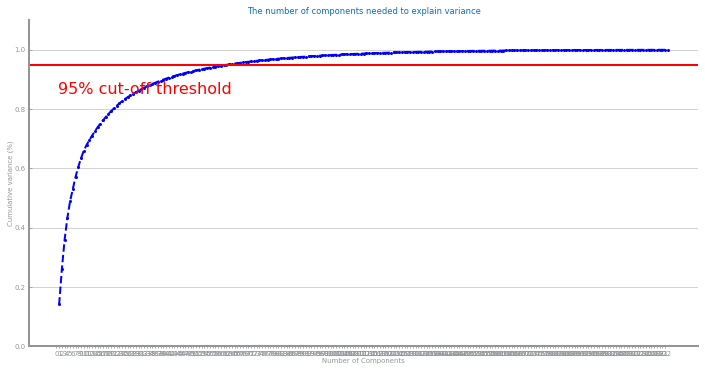

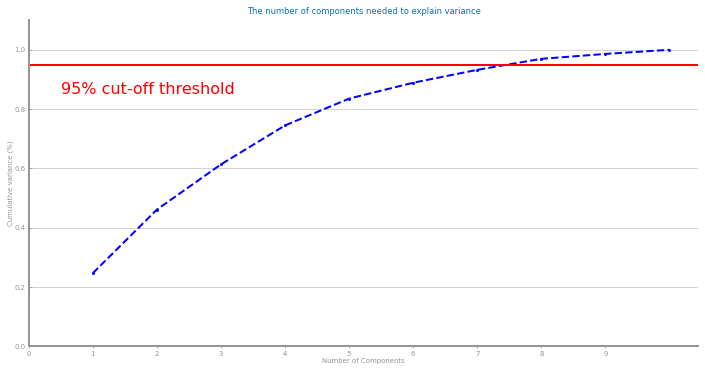

ANALYZING: ../datasets/pca_input/hf/HR_S_FCorr_extra_outlierTrim_IQS.csv


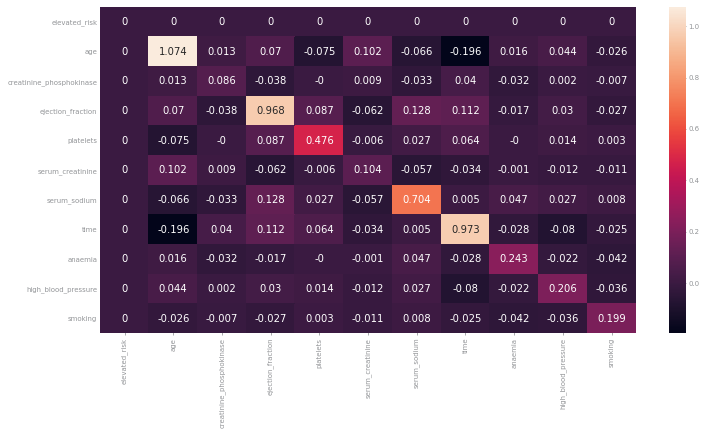

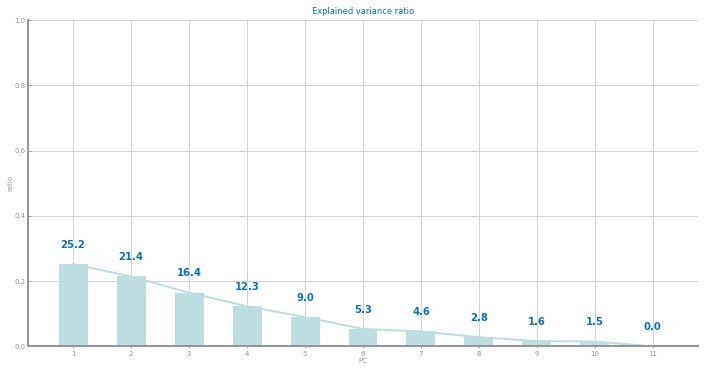

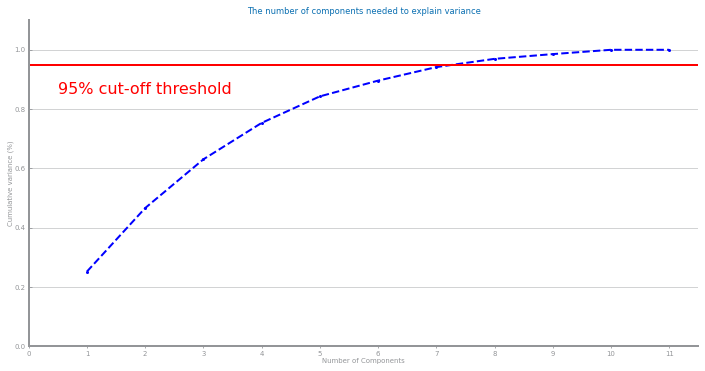

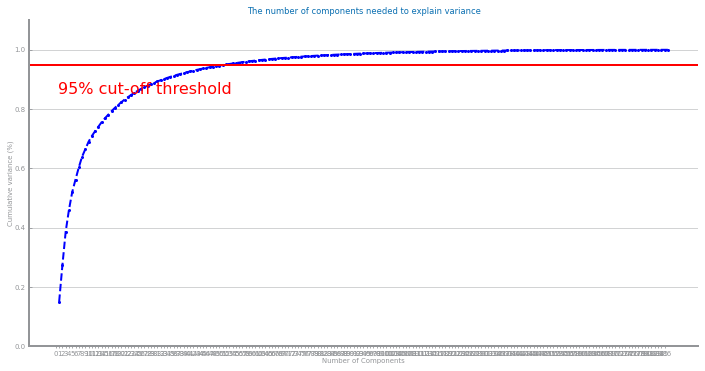

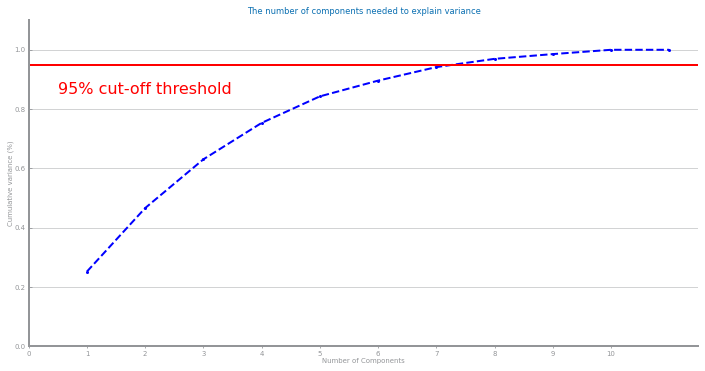

ANALYZING: ../datasets/pca_input/hf/HR_S_FCorr_extra_outlierTrim_IQS_B.csv


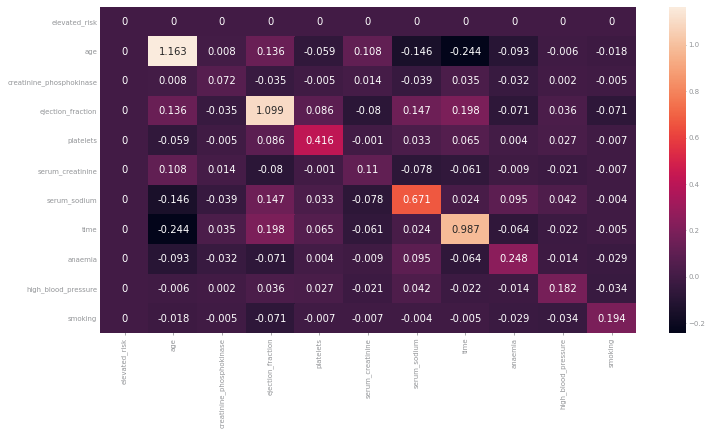

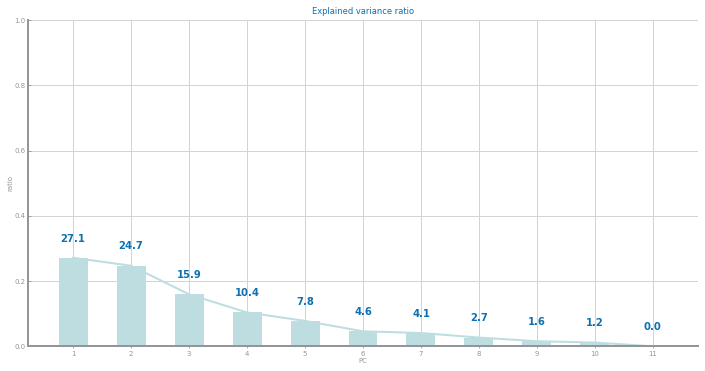

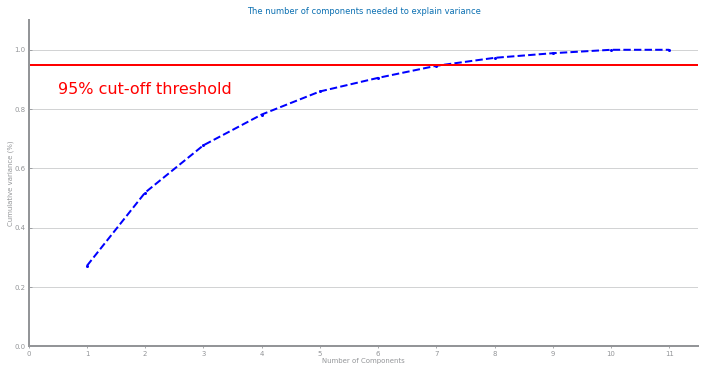

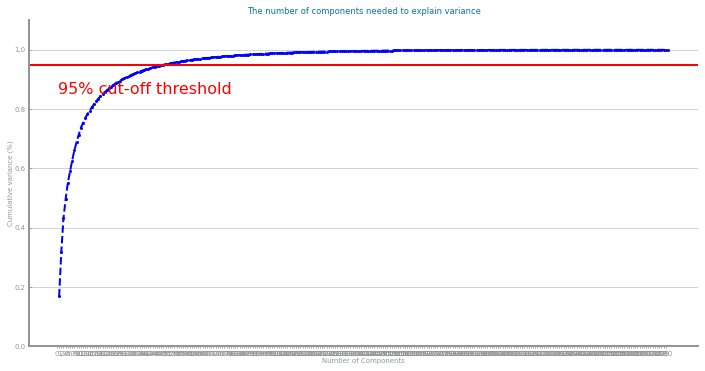

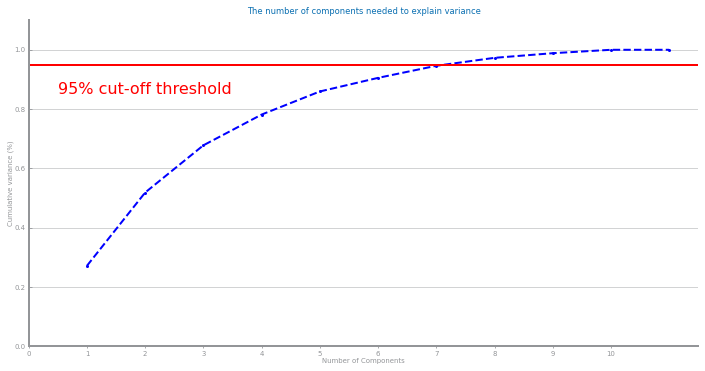

ANALYZING: ../datasets/pca_input/hf/HR_S_FCorr_outlierTrim_IQS.csv


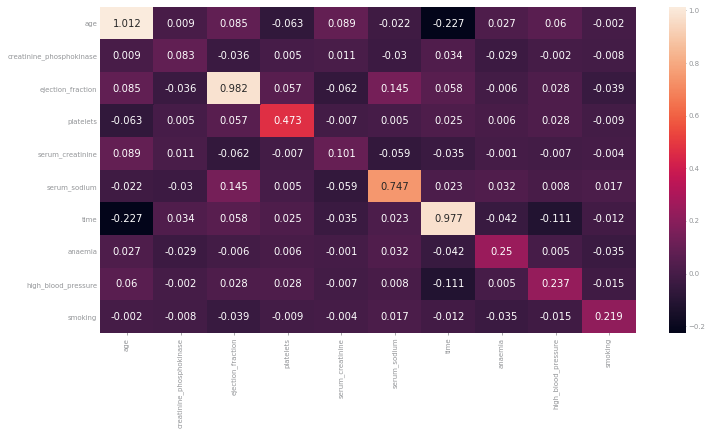

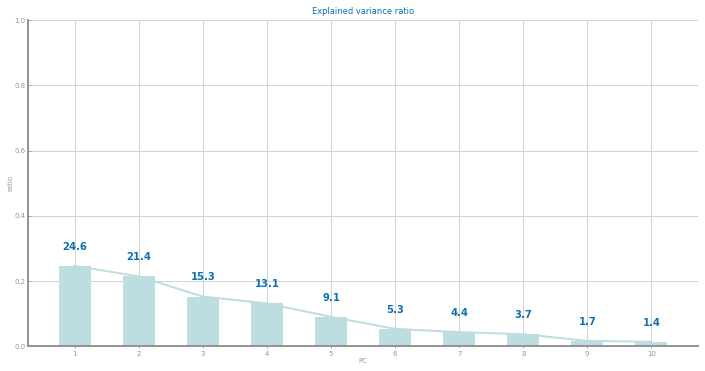

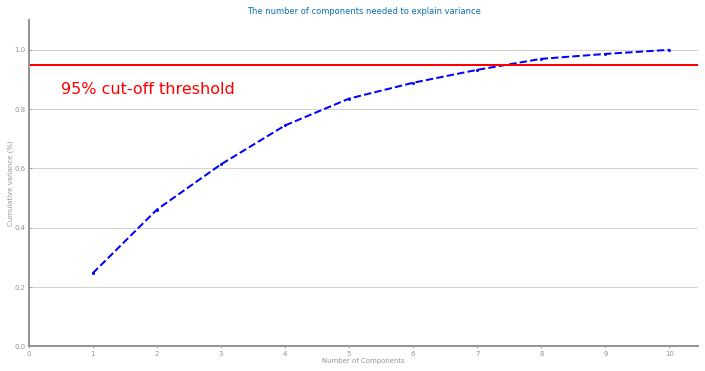

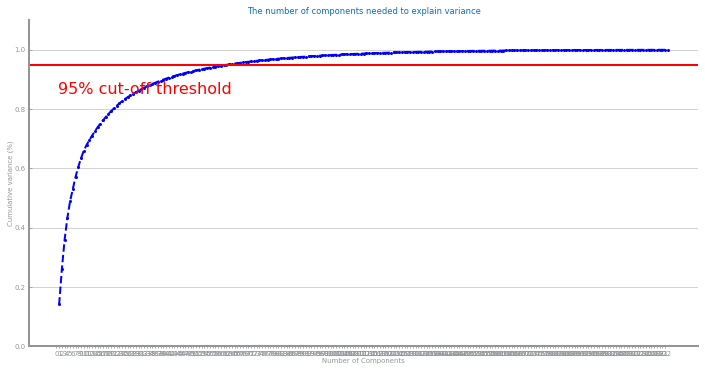

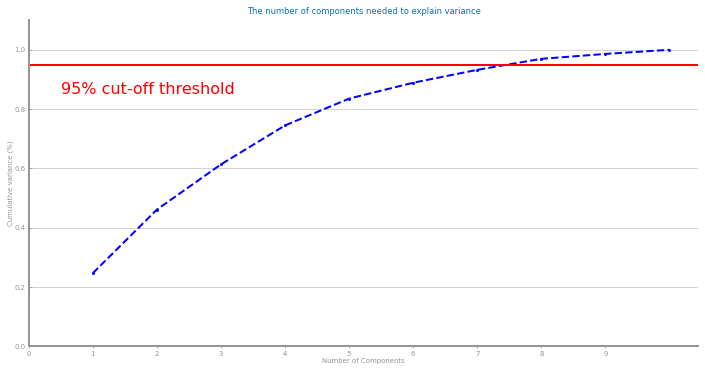

ANALYZING: ../datasets/pca_input/hf/HR_S_FCorr_outlierTrim_IQS_B.csv


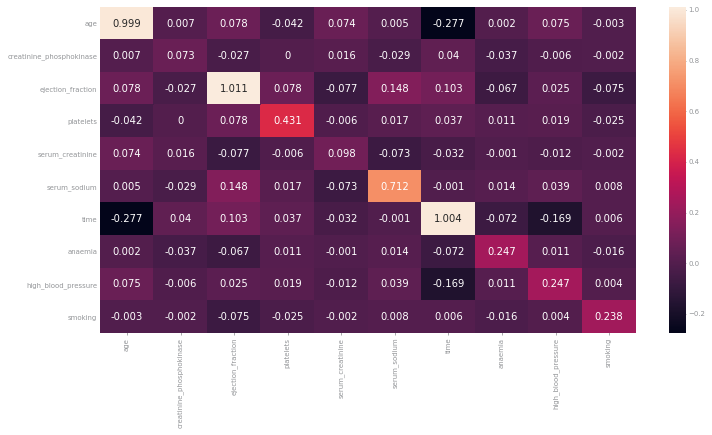

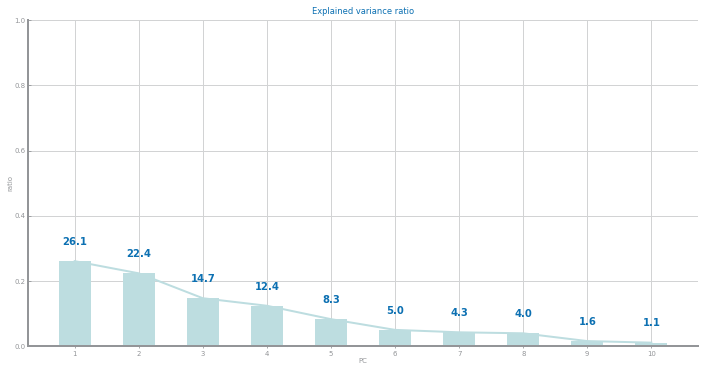

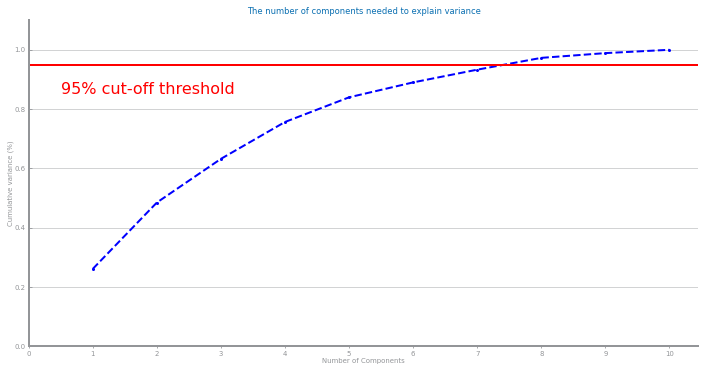

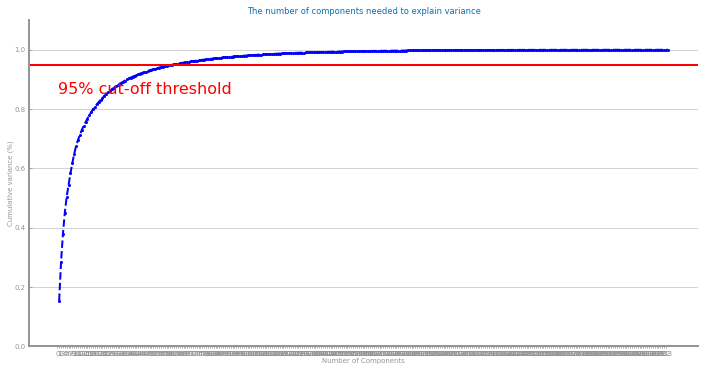

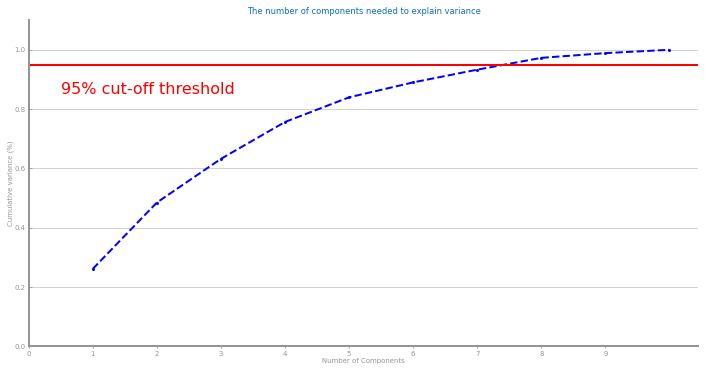

ANALYZING: ../datasets/pca_input/hf/HR_S_FImp_extra_outlierTrim_IQS.csv


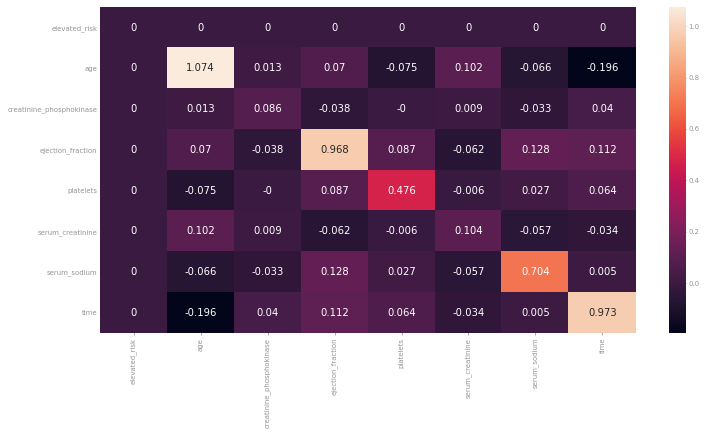

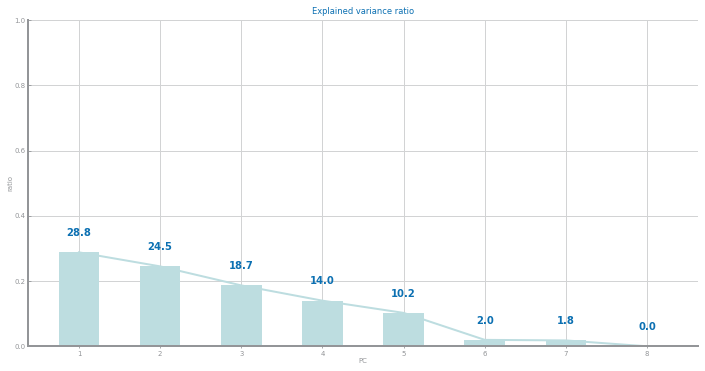

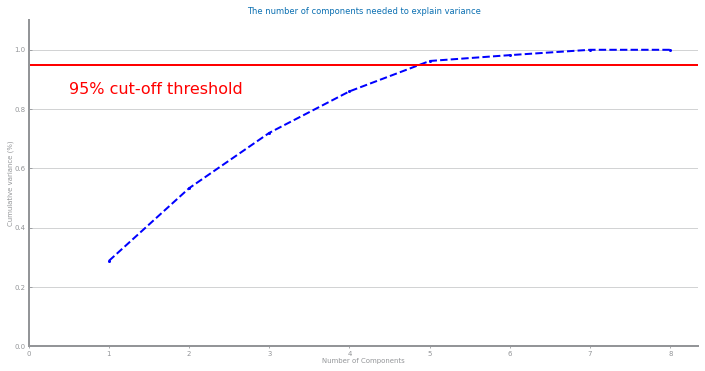

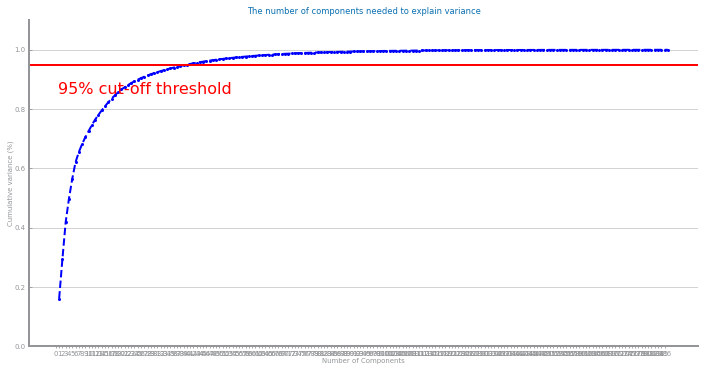

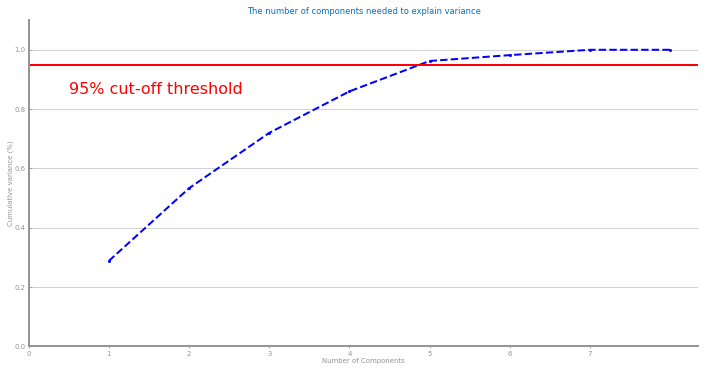

ANALYZING: ../datasets/pca_input/hf/HR_S_FImp_extra_outlierTrim_IQS_B.csv


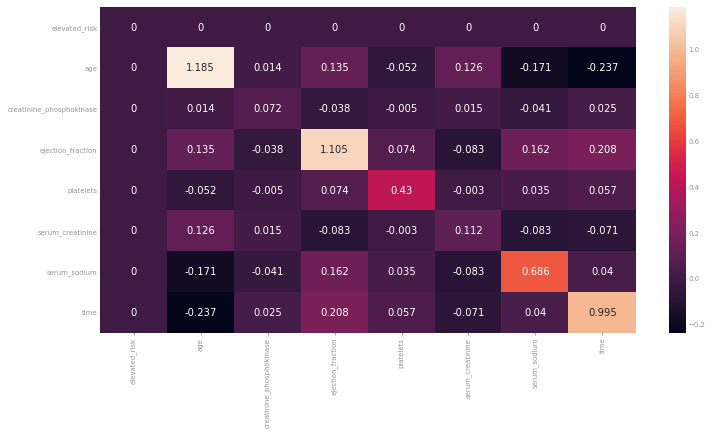

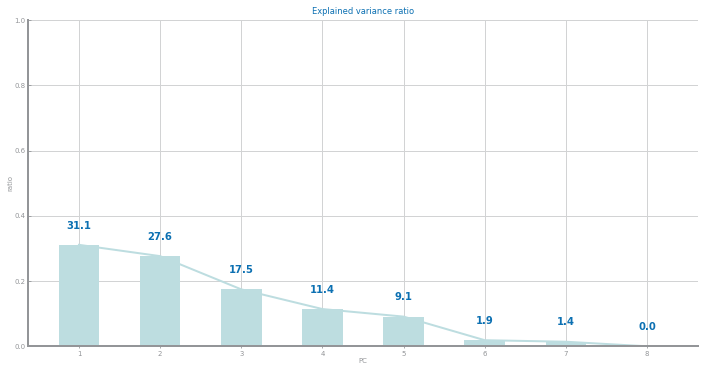

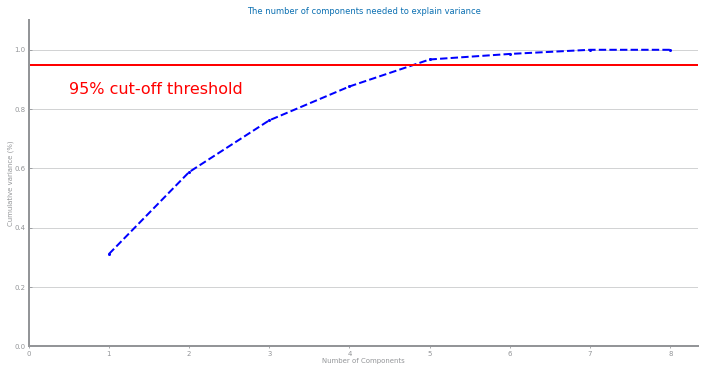

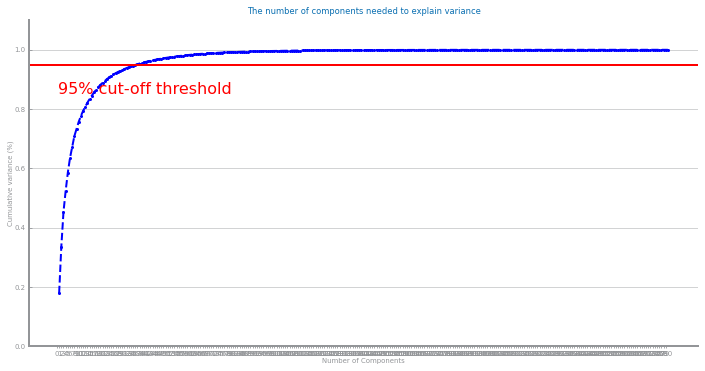

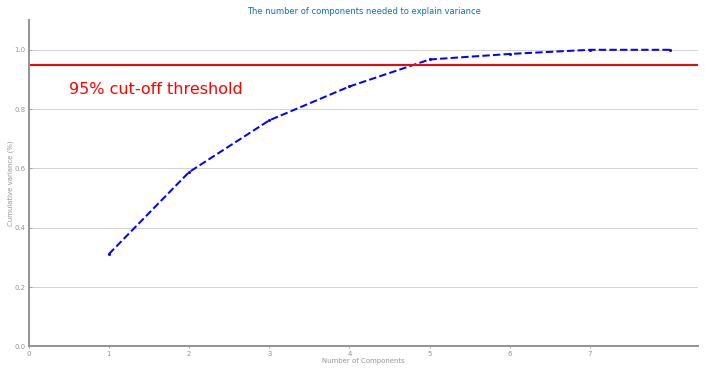

ANALYZING: ../datasets/pca_input/hf/HR_S_FImp_outlierTrim_IQS.csv


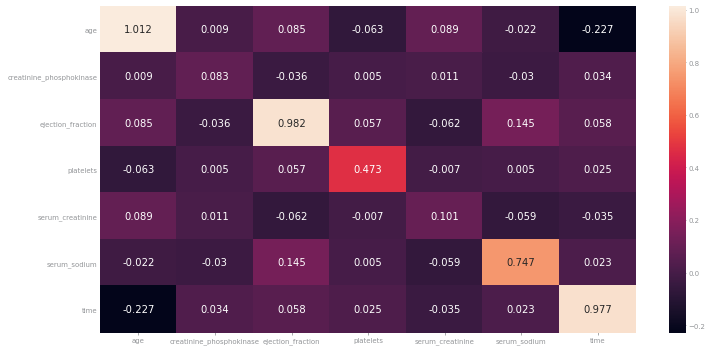

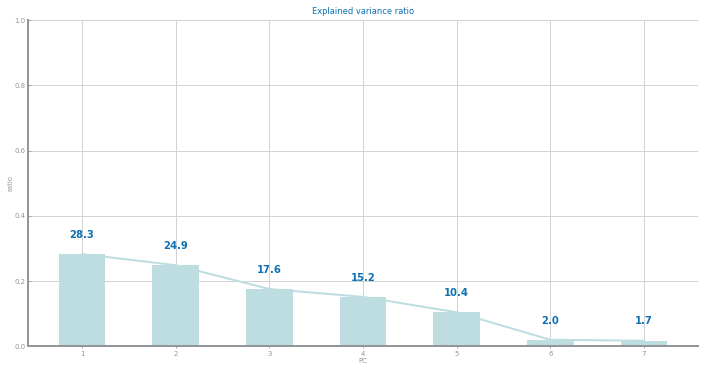

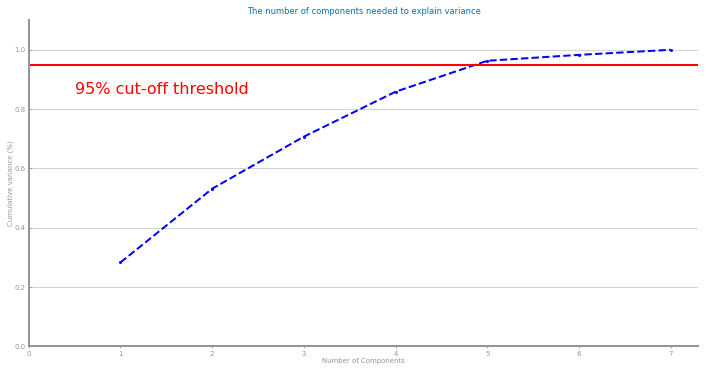

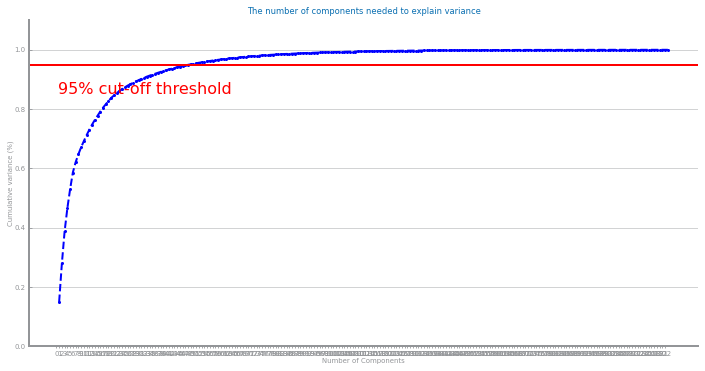

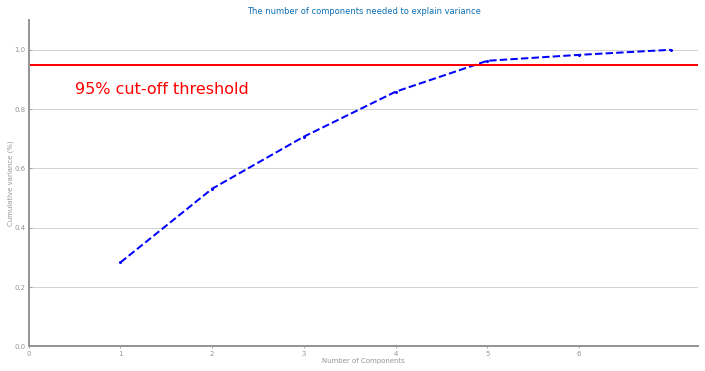

ANALYZING: ../datasets/pca_input/hf/HR_S_FImp_outlierTrim_IQS_B.csv


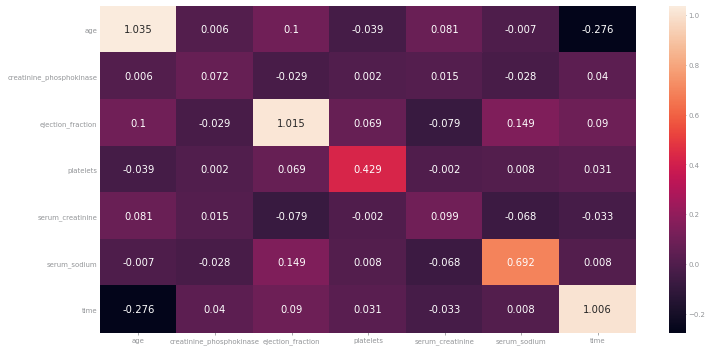

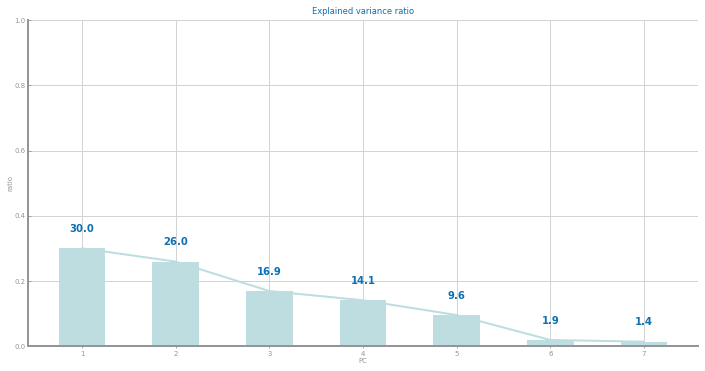

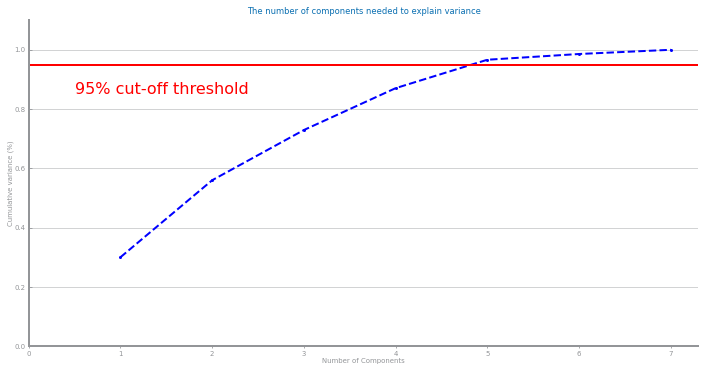

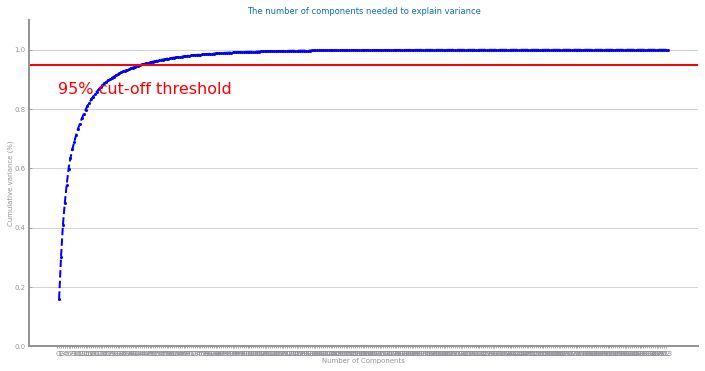

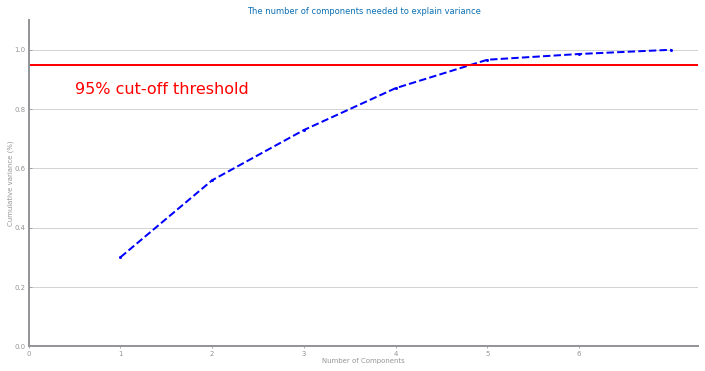

ANALYZING: ../datasets/pca_input/hf/HR_S_FMixed_extra_outlierTrim_IQS.csv


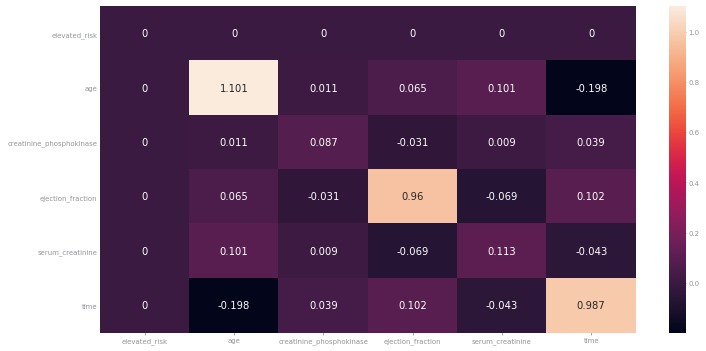

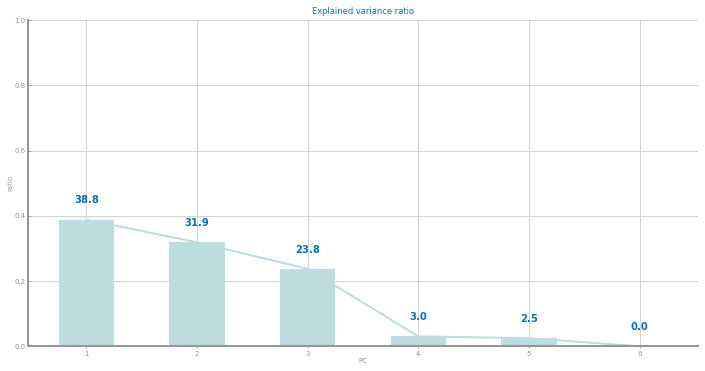

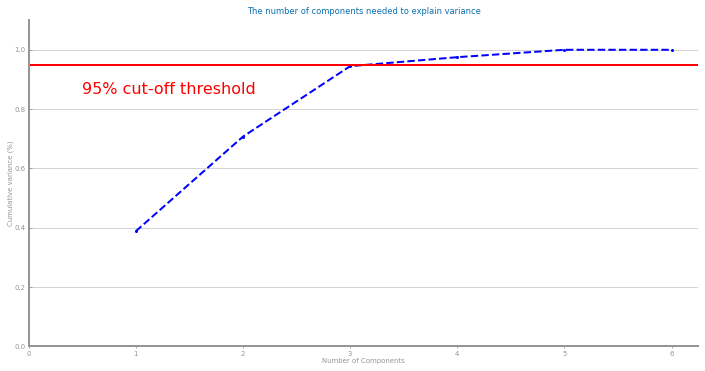

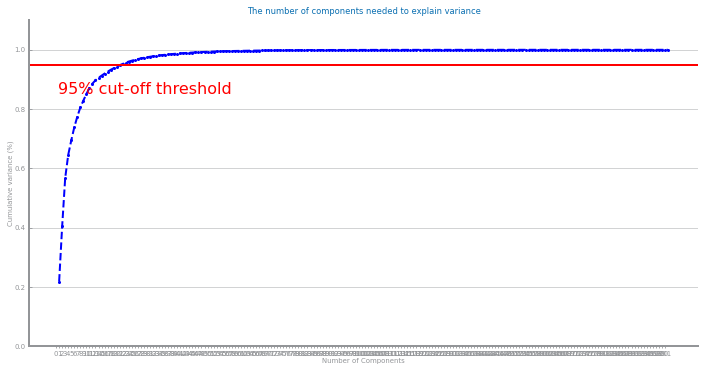

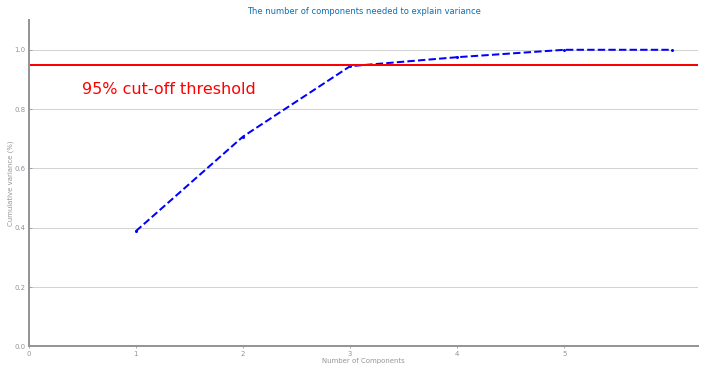

ANALYZING: ../datasets/pca_input/hf/HR_S_FMixed_extra_outlierTrim_IQS_B.csv


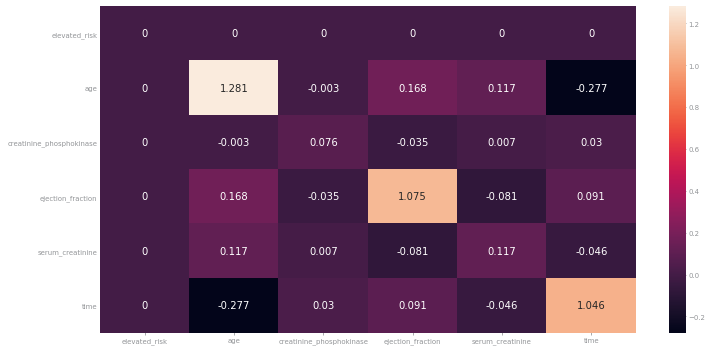

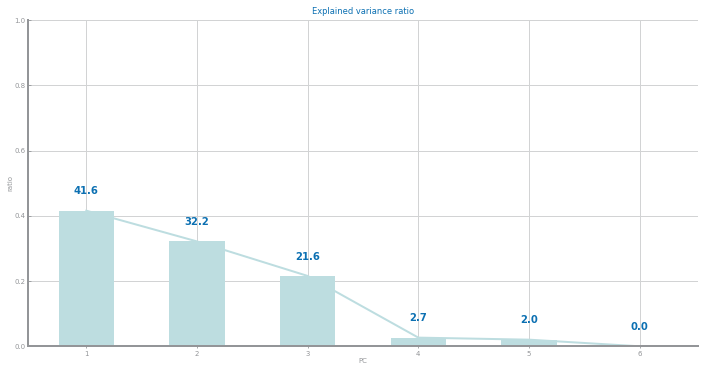

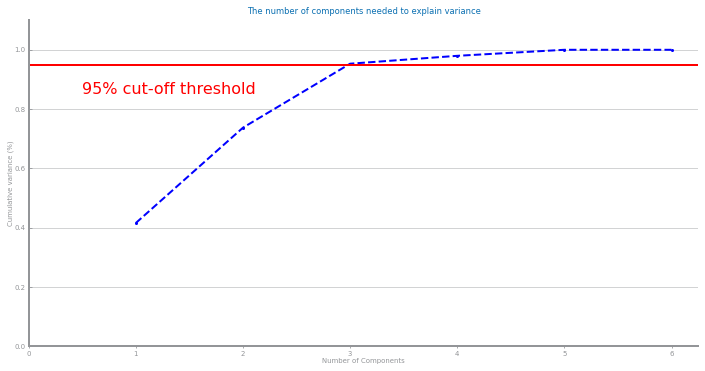

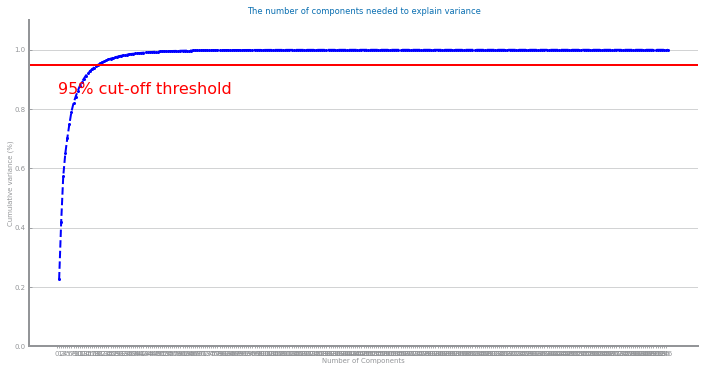

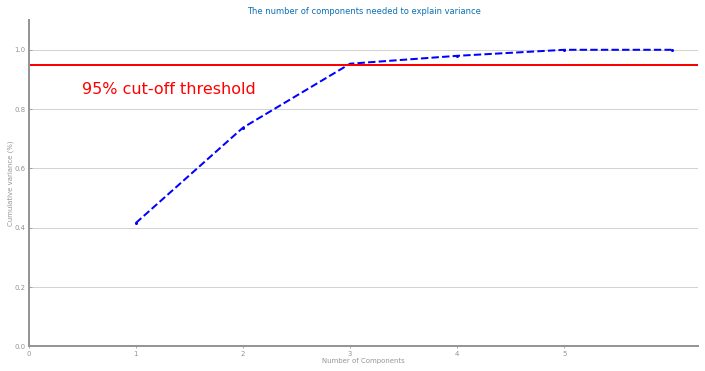

ANALYZING: ../datasets/pca_input/hf/HR_S_FMixed_outlierTrim_IQS.csv


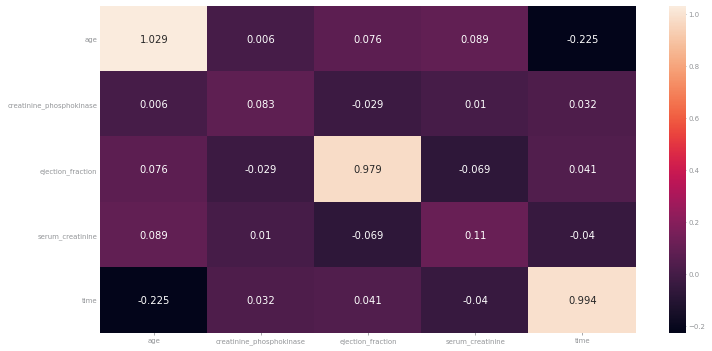

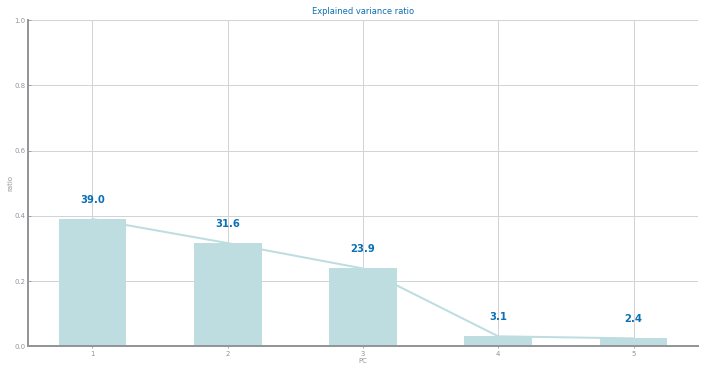

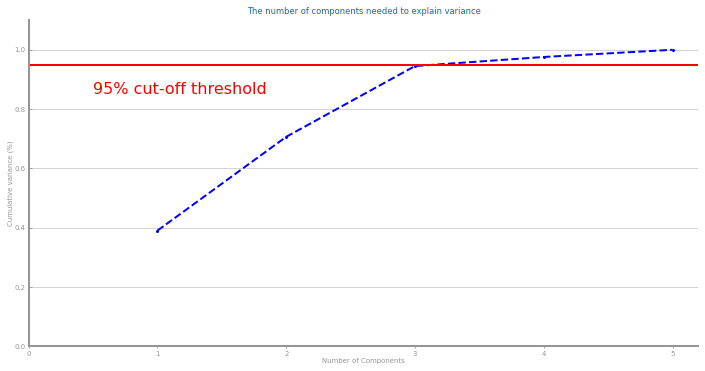

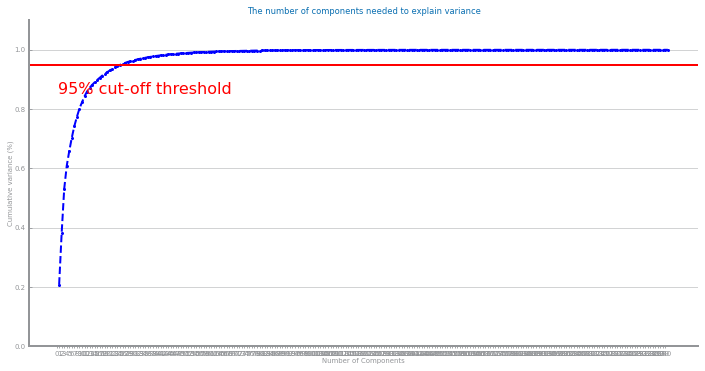

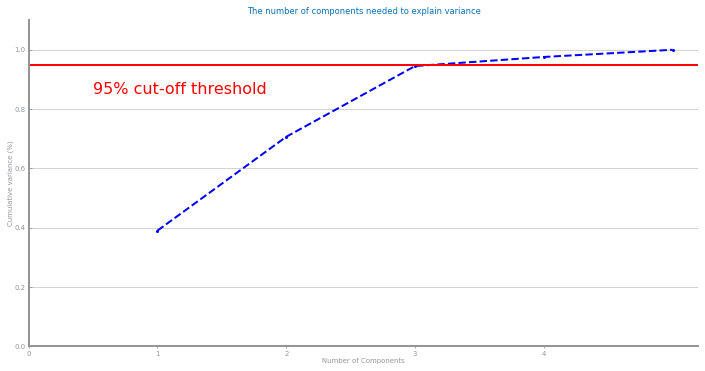

ANALYZING: ../datasets/pca_input/hf/HR_S_FMixed_outlierTrim_IQS_B.csv


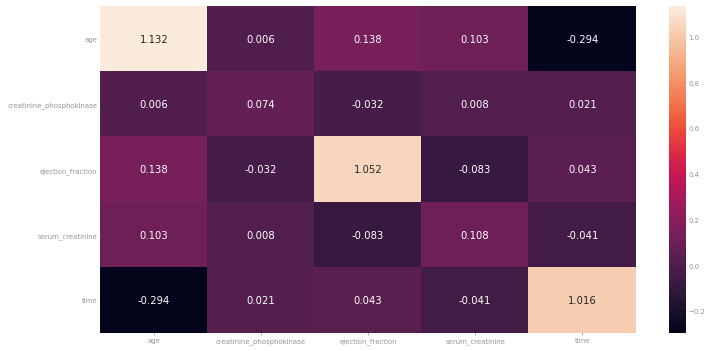

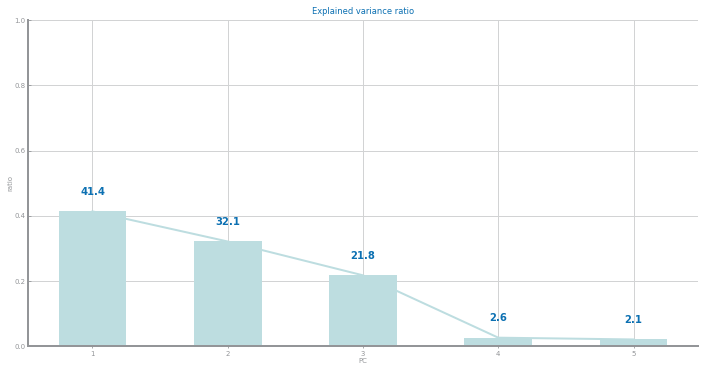

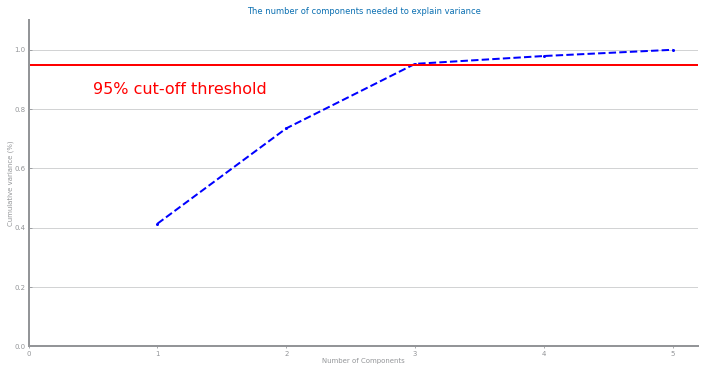

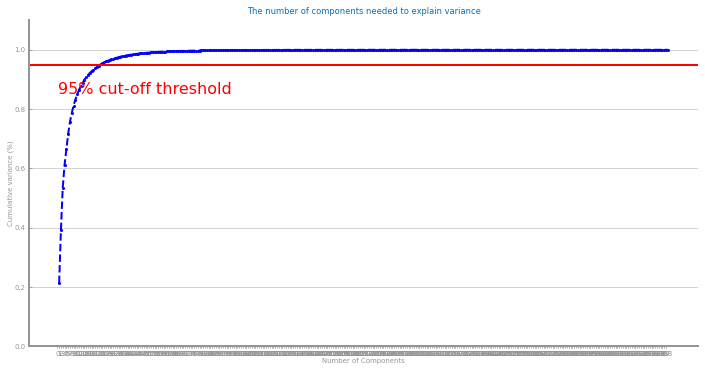

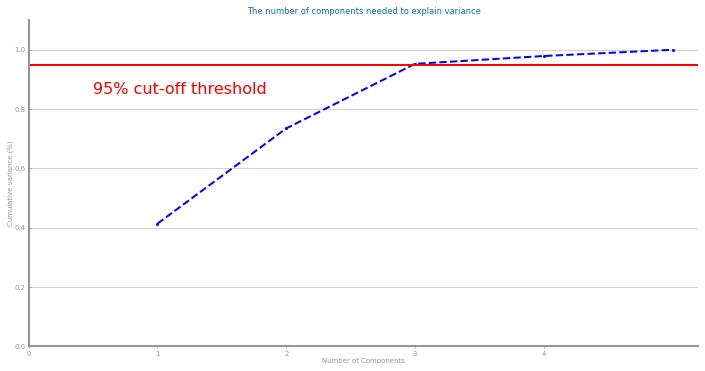

ANALYZING: ../datasets/pca_input/hf/HR_S_FRFE_extra_outlierTrim_IQS.csv


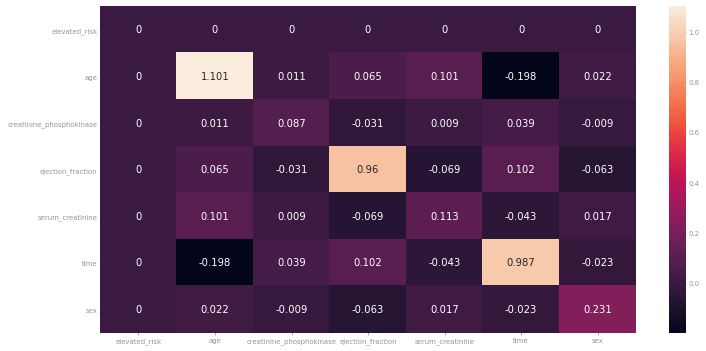

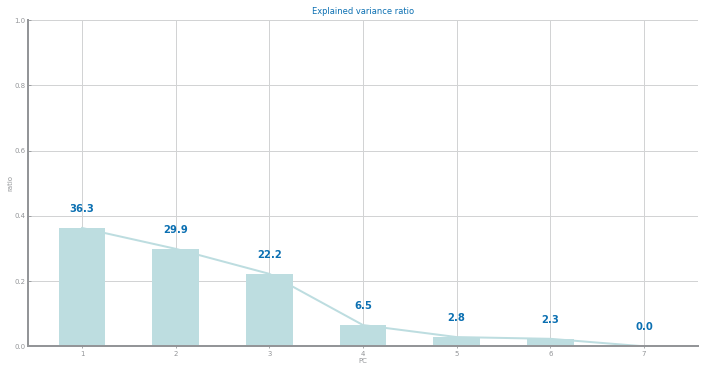

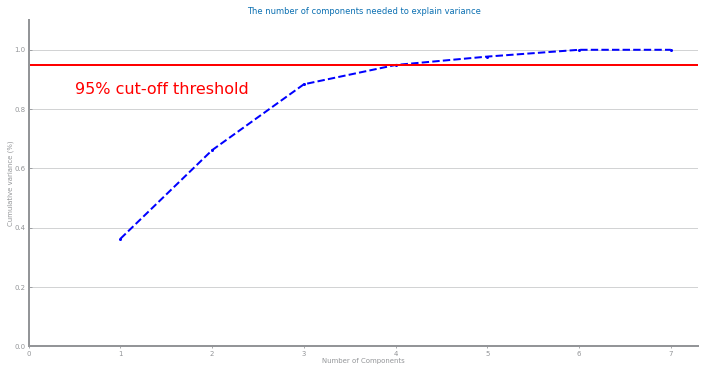

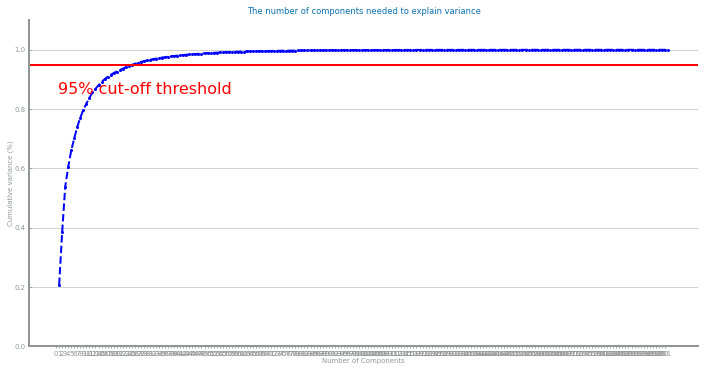

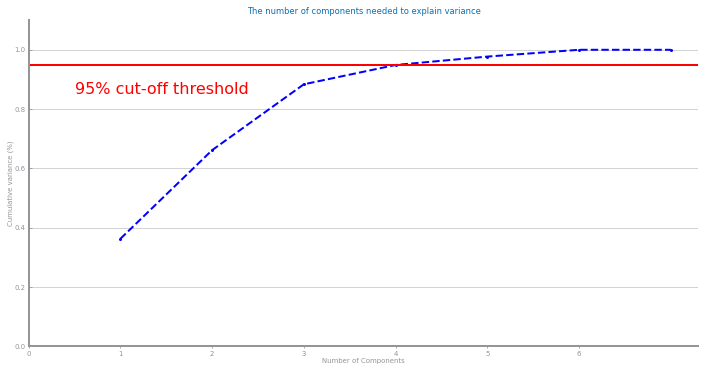

ANALYZING: ../datasets/pca_input/hf/HR_S_FRFE_extra_outlierTrim_IQS_B.csv


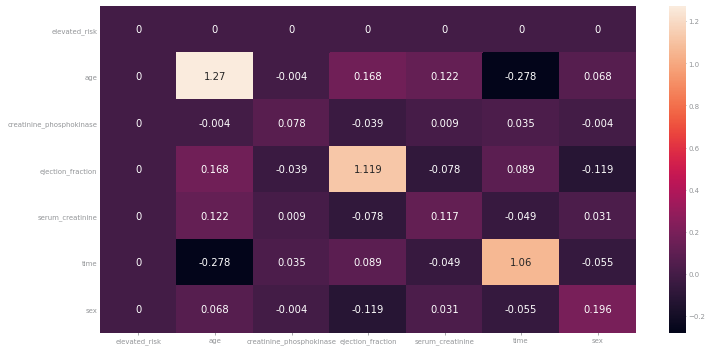

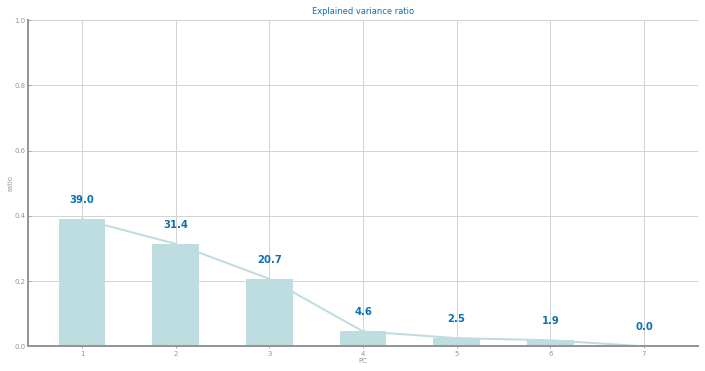

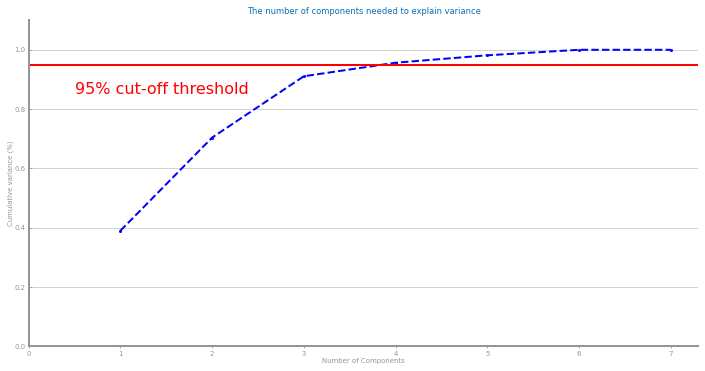

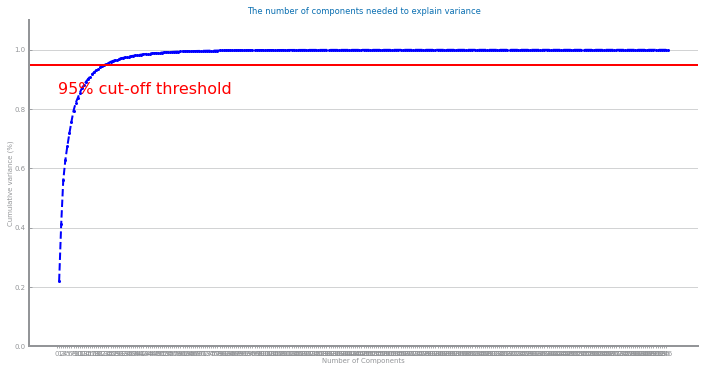

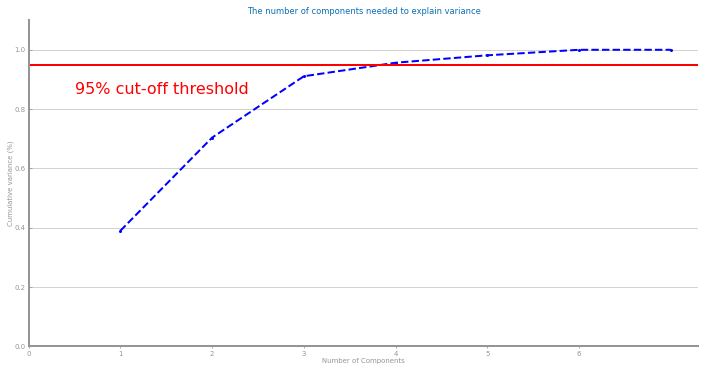

ANALYZING: ../datasets/pca_input/hf/HR_S_FRFE_outlierTrim_IQS.csv


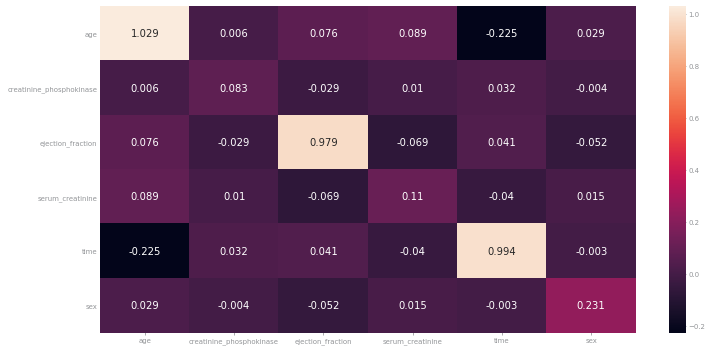

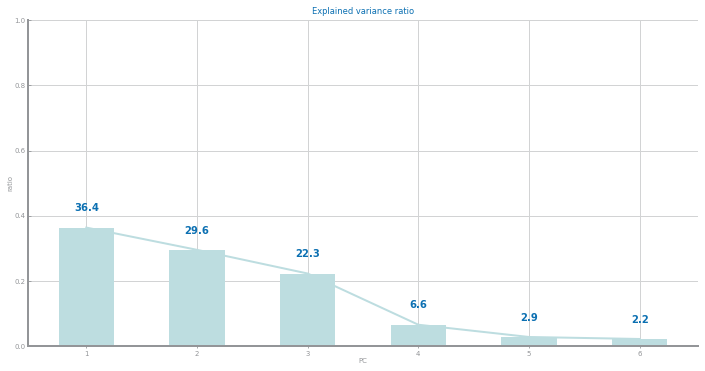

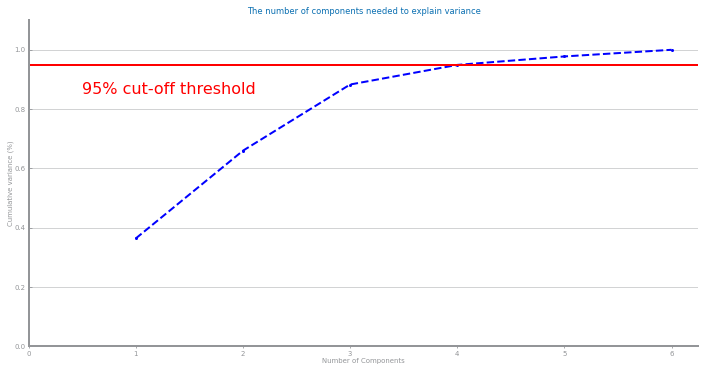

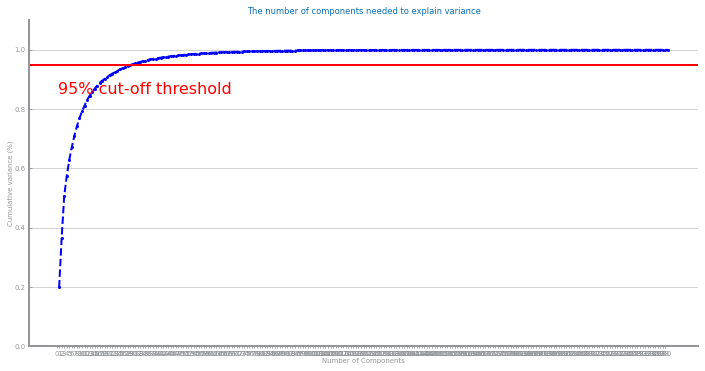

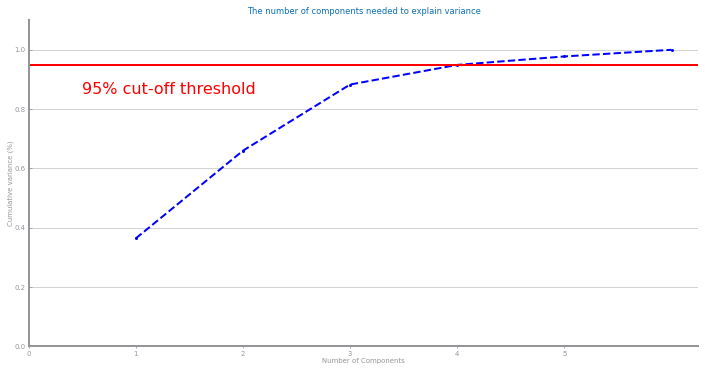

ANALYZING: ../datasets/pca_input/hf/HR_S_FRFE_outlierTrim_IQS_B.csv


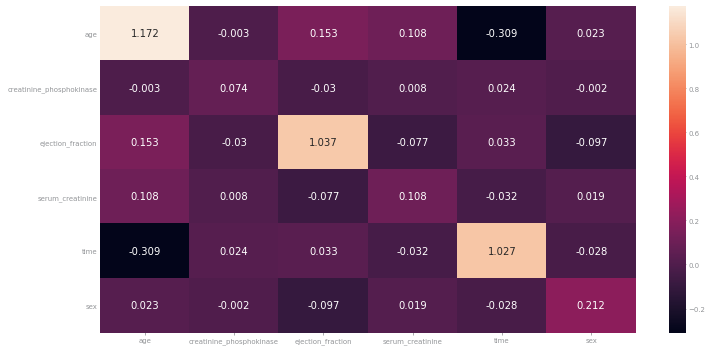

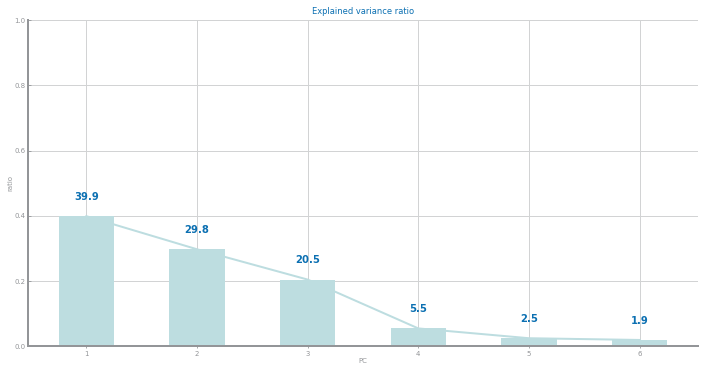

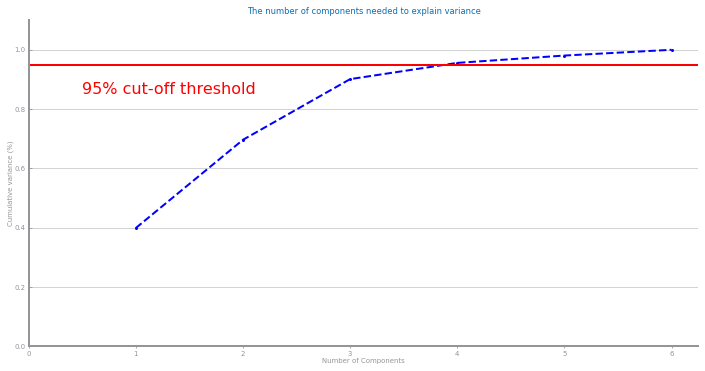

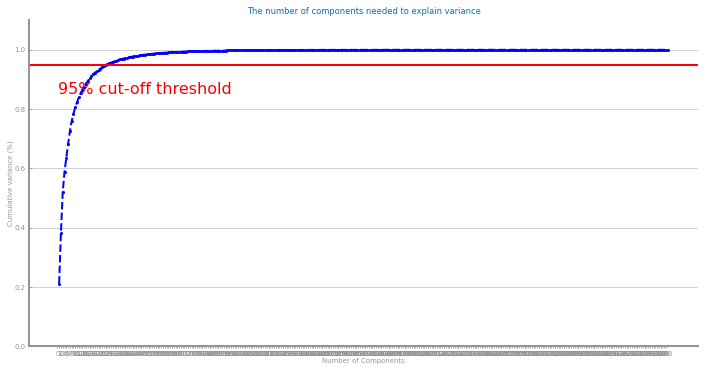

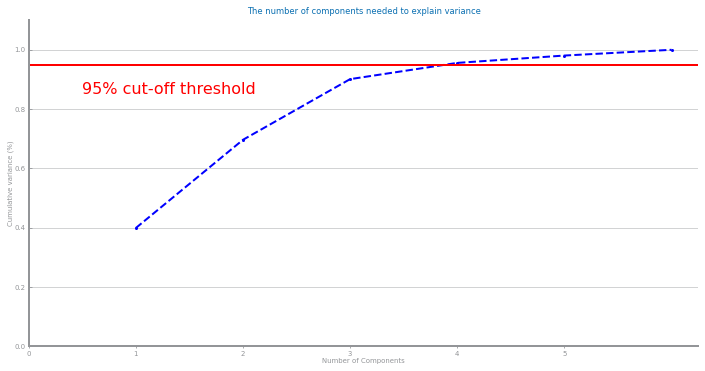

ANALYZING: ../datasets/pca_input/hf/HR_S_outlierTrim_IQS.csv


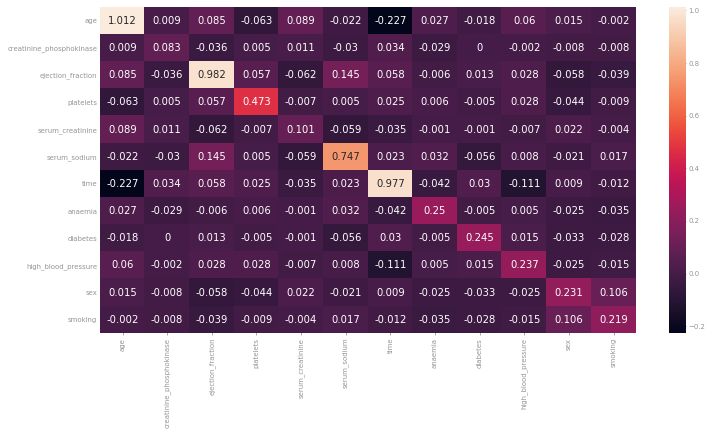

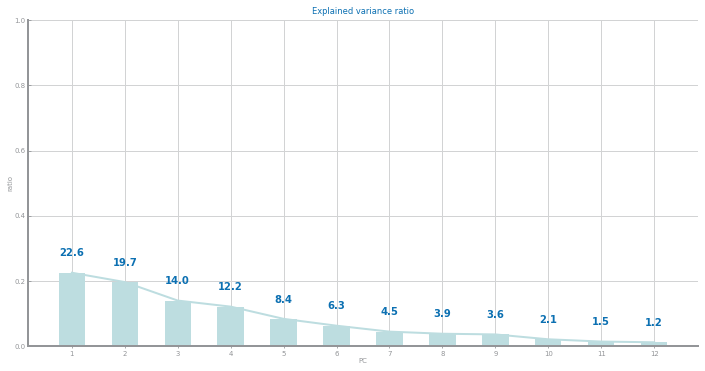

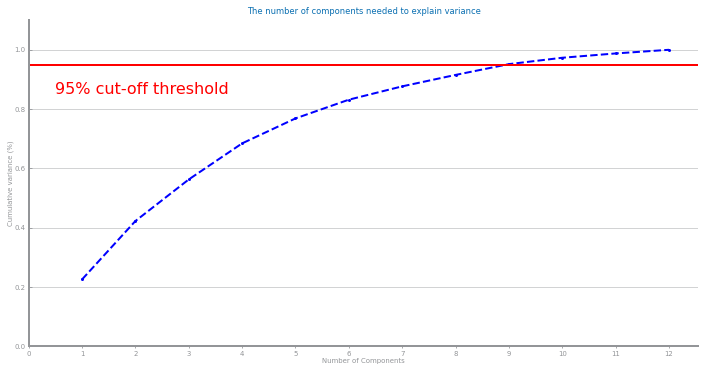

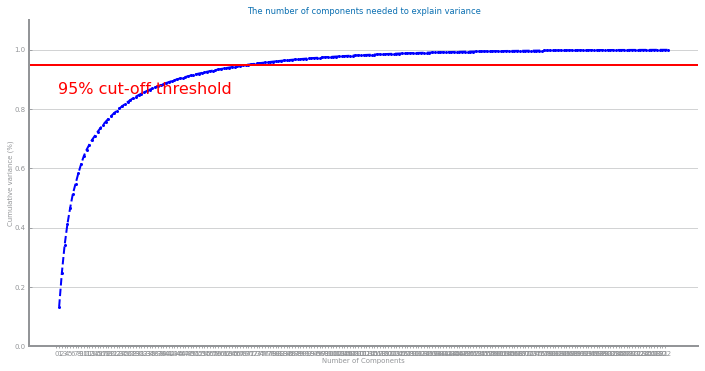

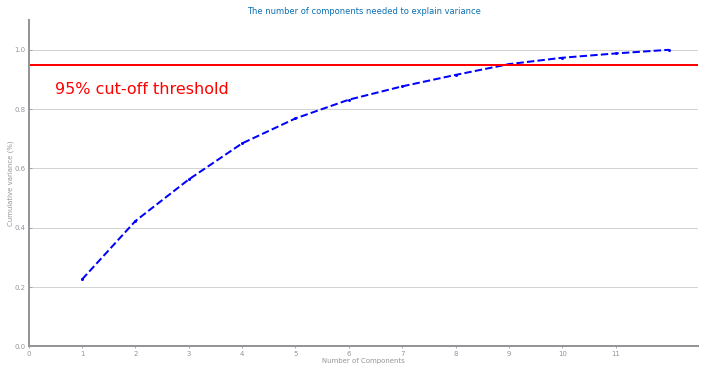

ANALYZING: ../datasets/pca_input/hf/HR_S_outlierTrim_Z.csv


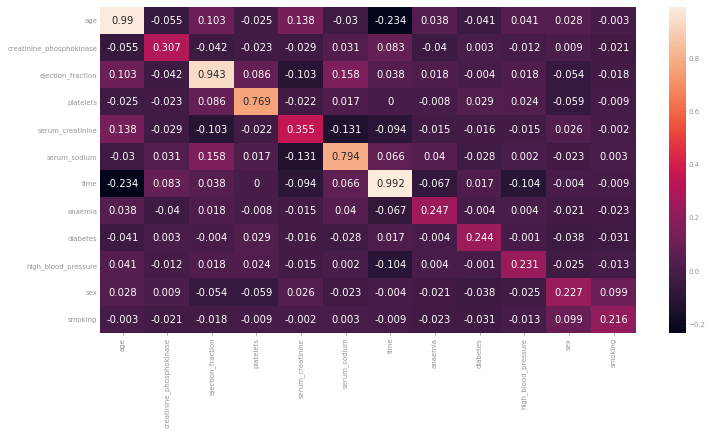

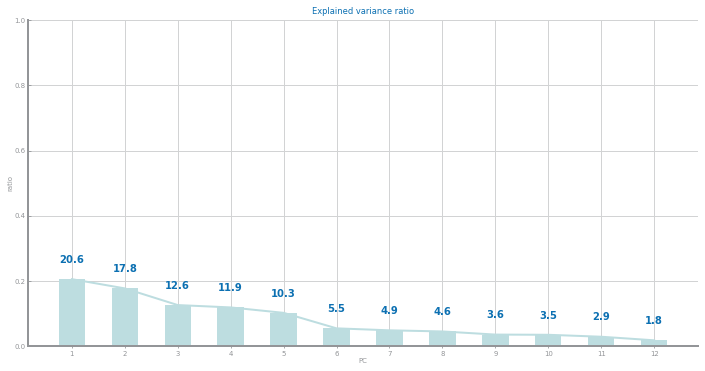

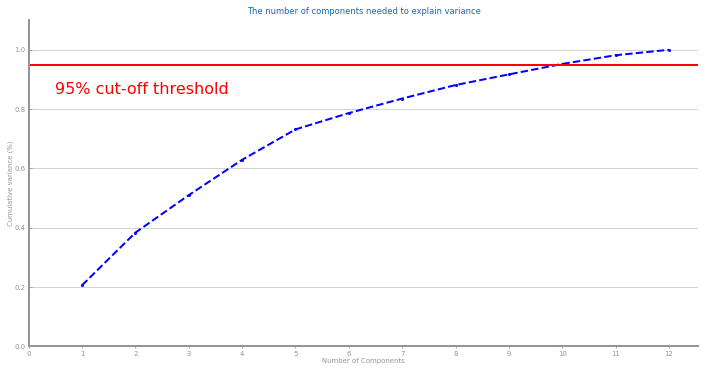

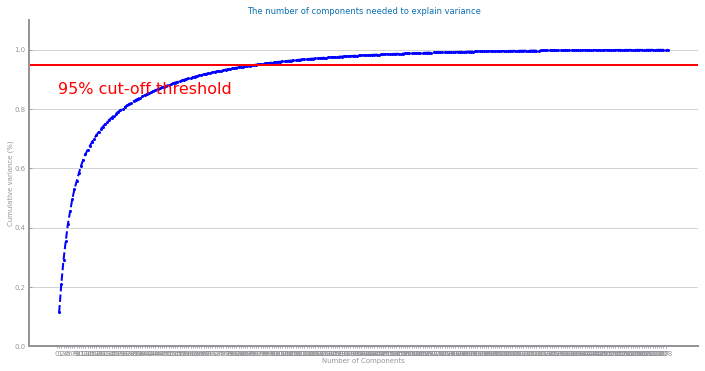

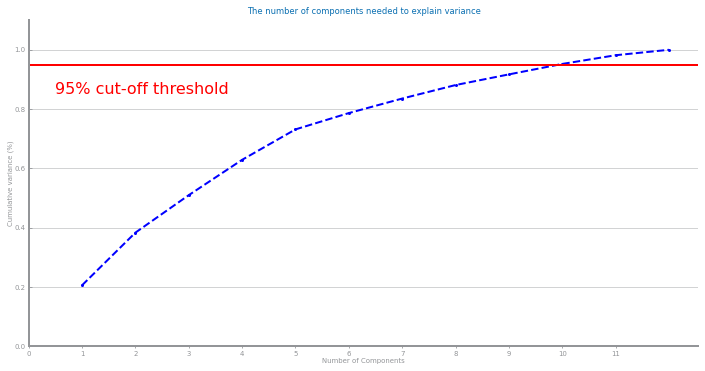

ANALYZING: ../datasets/pca_input/hf/HR_S_outlierWins.csv


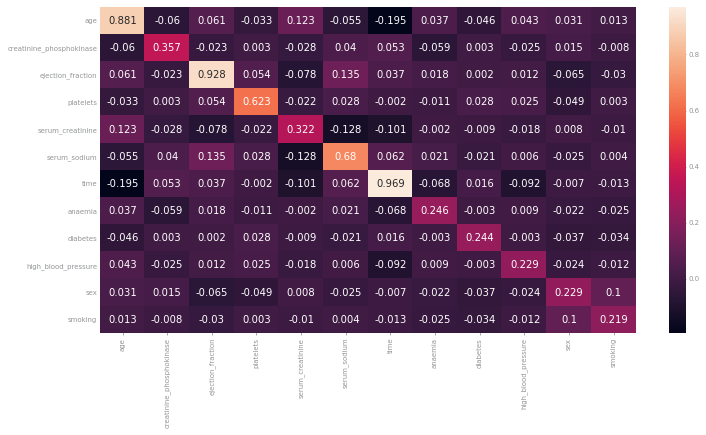

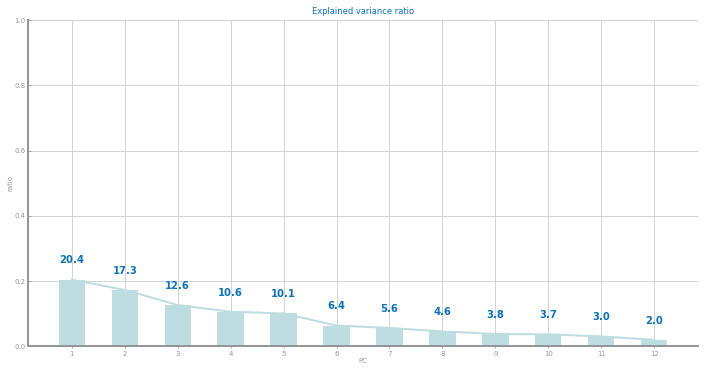

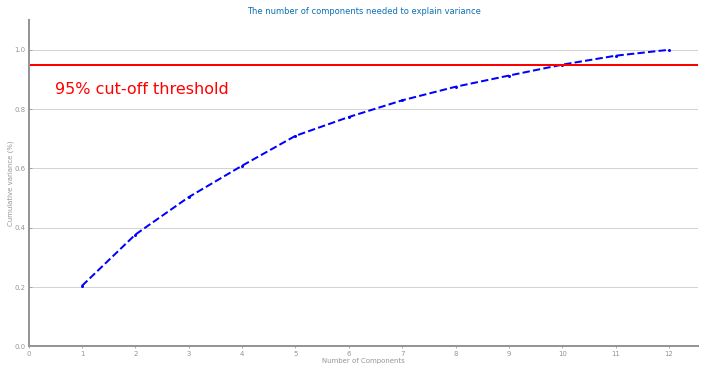

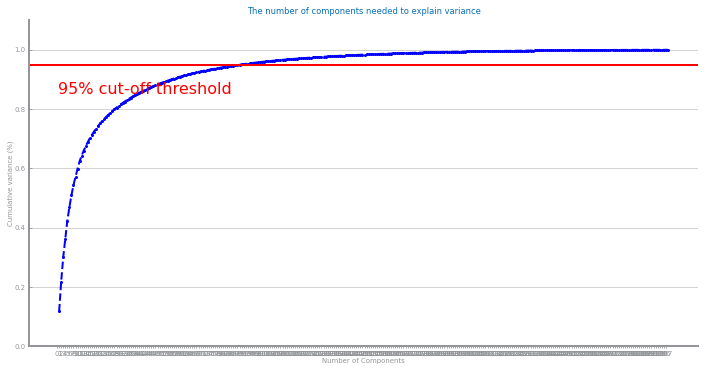

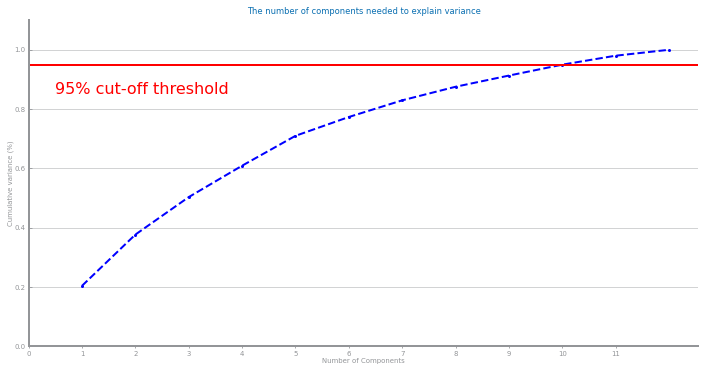

In [35]:
import os

directory = '../datasets/pca_input/hf'

overall_accs = []
datasets = []
    
for filename in os.listdir(directory):
    if filename.endswith(".csv"): 
        path = directory + '/' + filename
        
        perform_component_analysis(path)